In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from common import *

In [2]:
BG4_START = 40
BG8_START = 50

def busy_threads_at_time(sec, bg4_time, bg8_time):
    t = 0
    if sec > BG4_START and sec < BG4_START + bg4_time / 1000:
        t += 4
    if sec > BG8_START and sec < BG8_START + bg8_time / 1000:
        t += 8
    return t

def found_optimum(busy_threads):
    match busy_threads:
        case 0: return 8
        case 4: return 12
        case 8: return 8
        case 12: return 16
        case _: return -1

In [3]:
def plot(title, data, bg4_time, bg8_time):
    real, _, energy, t = unzip(data)

    plt.figure(figsize=(12,9))

    ax = sns.lineplot(x=acc(real), y=t, color='blue', label='Matmul')

    ts = [busy_threads_at_time(r, bg4_time, bg8_time) for r in acc(real)]
    sns.lineplot(x=acc(real), y=ts, label='Backgound processes', color=RED, ax=ax)
    
    fo = [found_optimum(t) for t in ts]
    sns.lineplot(x=acc(real), y=fo, label='Found optimum', color=GREEN, linestyle='--', ax=ax)
    
    ax.set_xlabel('Runtime (s)')
    ax.set_ylabel('#Threads')
    ax.set_ylim((0, 17))

---

Energy: 12827.20J, Runtime: 289.93s


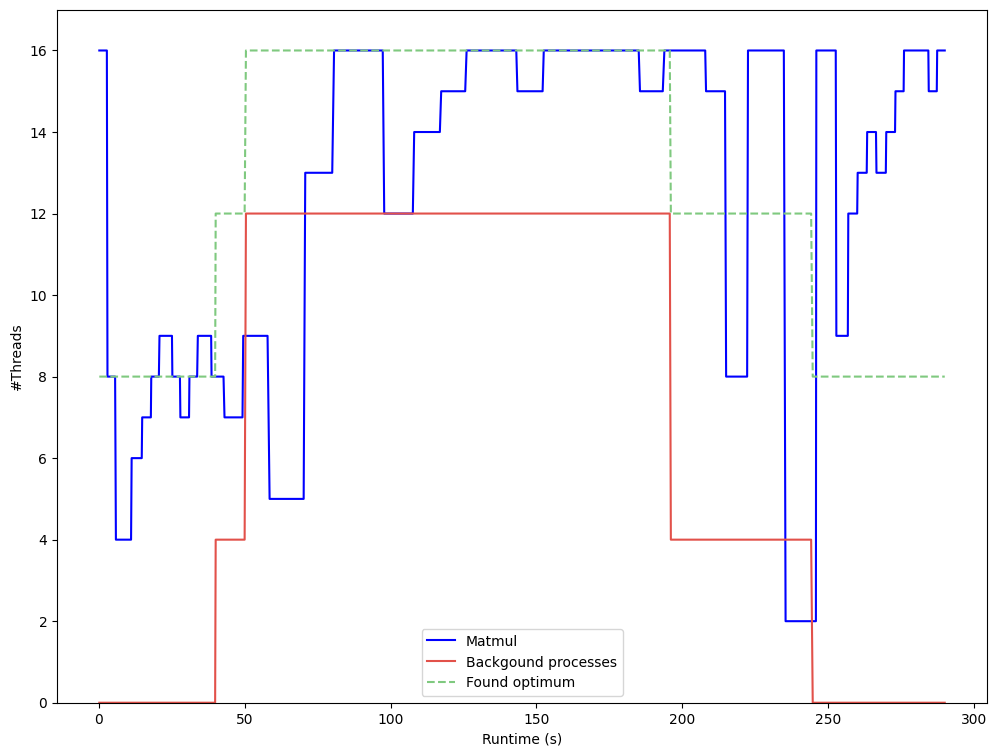

In [4]:
data = [(190534570, 191525648, 8456888, 16), (136318213, 135992760, 6527815, 16), (136445022, 136026161, 6501997, 16), (136514069, 136025276, 6491195, 16), (136321031, 136018164, 6552351, 16), (136587984, 136022214, 6495345, 16), (136321703, 135984959, 6564924, 16), (136384209, 136005908, 6513961, 16), (136497606, 136023274, 6554854, 16), (136240269, 136012851, 6552107, 16), (136499078, 139779861, 6534346, 16), (136634192, 136037408, 6568220, 16), (136795057, 136046466, 6585433, 16), (136452487, 136025420, 6538924, 16), (136554607, 136021623, 6551008, 16), (136311954, 136008620, 6547103, 16), (136325742, 136015956, 6520247, 16), (136235069, 135979881, 6587385, 16), (136195249, 136010266, 6566756, 16), (136573453, 139784270, 6598310, 16), (207228548, 204884001, 7756939, 8), (136549687, 139567516, 6291426, 8), (136489342, 136053874, 6279647, 8), (136579180, 136071309, 6275558, 8), (136504128, 136062178, 6260787, 8), (136584883, 136072319, 6258407, 8), (136547577, 136067079, 6307479, 8), (136575318, 136068366, 6302657, 8), (156516409, 157074631, 6954450, 8), (138253232, 136277898, 6371261, 8), (137625892, 136200763, 6338362, 8), (137214985, 139646855, 6299606, 8), (136797021, 136099228, 6299544, 8), (136653223, 136081160, 6305953, 8), (136576499, 136070438, 6267868, 8), (136435068, 136052650, 6349227, 8), (136487207, 139559190, 6275618, 8), (136550754, 136065604, 6319686, 8), (136557468, 136068440, 6323043, 8), (136554974, 136068609, 6289901, 8), (272669144, 273990014, 7892558, 4), (272719962, 272140554, 7863627, 4), (272577314, 272112002, 7879680, 4), (272483901, 275096944, 7850932, 4), (275503964, 272852912, 7967814, 4), (274355806, 275580008, 7921671, 4), (273620014, 272381141, 7918987, 4), (273150314, 275267191, 7889506, 4), (273107491, 272253209, 7882487, 4), (275022873, 275730615, 8016093, 4), (272987821, 272219906, 8110636, 4), (272766998, 272167781, 7890421, 4), (272464764, 272093377, 7865520, 4), (272595485, 272121535, 7896525, 4), (272575350, 275119665, 7879313, 4), (272843598, 272186462, 7894267, 4), (274851672, 275689461, 7964640, 4), (272489771, 272093733, 7874370, 4), (272513169, 272105198, 7861186, 4), (274674946, 272644148, 7946696, 4), (200164888, 199168794, 7347393, 6), (182571115, 180424598, 6837751, 6), (182332429, 183720862, 6836469, 6), (182217248, 180367481, 6849226, 6), (182112788, 183683655, 6823103, 6), (182146235, 180355614, 6866193, 6), (182270789, 183707980, 6812971, 6), (182042802, 180334591, 6824628, 6), (182021581, 183667093, 6793440, 6), (182108313, 180350049, 6809797, 6), (182085331, 183680231, 6792219, 6), (182133499, 183684111, 6785139, 6), (181854742, 180305164, 6806745, 6), (182126844, 183687305, 6778059, 6), (181994928, 180330770, 6803449, 6), (182842078, 183806195, 6823958, 6), (182512410, 180416914, 6829267, 6), (182496705, 183742790, 6790021, 6), (182209314, 183700610, 6819258, 6), (182488408, 180413975, 6793134, 6), (156010906, 155607065, 6488509, 7), (155924436, 155988695, 6489852, 7), (155787431, 155967153, 6501509, 7), (155853513, 155977897, 6452925, 7), (155803097, 155969059, 6491622, 7), (155824938, 155974388, 6474593, 7), (155768249, 155964514, 6496260, 7), (155927300, 155989021, 6464644, 7), (155770477, 155966714, 6442122, 7), (155898674, 155982998, 6484786, 7), (156622534, 156084597, 6520003, 7), (156374916, 156049663, 6519026, 7), (156132301, 156018480, 6493758, 7), (156086581, 156011161, 6476301, 7), (156080951, 156010891, 6511703, 7), (156333326, 156046888, 6470381, 7), (157733775, 159674323, 6564802, 7), (157155755, 156162227, 6503463, 7), (155843408, 155977141, 6473067, 7), (155839712, 155976625, 6482161, 7), (136553196, 135871039, 6308516, 8), (136552284, 136067163, 6348129, 8), (136564820, 136069373, 6300154, 8), (136517699, 136061048, 6366012, 8), (136481159, 139559372, 6301620, 8), (136461002, 136056753, 6374678, 8), (136598075, 136074055, 6312545, 8), (136559148, 136067906, 6339828, 8), (136613582, 136075994, 6366866, 8), (136578768, 136070195, 6301192, 8), (143954745, 143992346, 6704023, 8), (145873900, 147732571, 6816084, 8), (136553729, 136066842, 6294295, 8), (136522930, 136063178, 6370528, 8), (136446580, 136054860, 6314743, 8), (136481408, 136059195, 6359358, 8), (136528096, 136063571, 6355697, 8), (136499401, 136060033, 6317244, 8), (136432938, 139551329, 6309005, 8), (136463171, 136050039, 6350936, 8), (209781180, 208099521, 9059059, 9), (224156826, 224015265, 9553687, 9), (222101801, 223783794, 9482458, 9), (217310060, 216138617, 9315040, 9), (241787384, 241002104, 10175816, 9), (226075252, 224226778, 9639074, 9), (224754581, 224080350, 9599158, 9), (224132902, 224010345, 9576758, 9), (224635230, 224068690, 9625524, 9), (224579207, 227617171, 9594458, 9), (224386253, 224035418, 9583716, 9), (223460810, 223937195, 9535498, 9), (223589122, 220397250, 9567786, 9), (222594594, 223841672, 9478369, 9), (223479487, 223941489, 9560522, 9), (223013770, 223885342, 9517371, 9), (228952955, 228102174, 9799719, 9), (226097272, 224227461, 9627111, 9), (225559070, 227727092, 9679480, 9), (226430090, 224267713, 9644689, 9), (136608669, 140058159, 6344039, 8), (136457434, 136056159, 6330428, 8), (136494836, 136060715, 6313705, 8), (136505539, 136061602, 6360701, 8), (136478477, 136059057, 6317245, 8), (136506002, 136062863, 6358932, 8), (136805233, 136098353, 6363142, 8), (136558807, 139568390, 6318649, 8), (136579502, 136069887, 6344588, 8), (136579842, 136069313, 6371077, 8), (136563863, 136069790, 6303146, 8), (136514741, 136063436, 6370040, 8), (136538060, 136066763, 6320296, 8), (136509505, 136062022, 6357284, 8), (136465815, 139556150, 6317061, 8), (136559751, 136067950, 6361983, 8), (136498770, 136061435, 6318405, 8), (136559656, 136069058, 6361556, 8), (136519606, 136063237, 6316817, 8), (136472559, 136057373, 6361129, 8), (156001309, 156385680, 6471724, 7), (155984148, 155995182, 6467818, 7), (156020770, 156002115, 6454939, 7), (155926739, 155986933, 6491256, 7), (155891144, 155979288, 6510115, 7), (155972493, 155993087, 6495405, 7), (155864665, 155979912, 6490096, 7), (155980904, 155996227, 6454940, 7), (155906156, 155984835, 6505049, 7), (155787032, 155967245, 6487837, 7), (156083715, 156011487, 6509444, 7), (155782024, 155967078, 6480819, 7), (155928169, 155987020, 6507185, 7), (155803404, 155971295, 6494124, 7), (155769317, 155965995, 6499190, 7), (155821524, 155972907, 6486983, 7), (155785724, 155968369, 6468184, 7), (155758298, 155964979, 6506087, 7), (155814767, 155970614, 6490340, 7), (155835908, 155974820, 6510115, 7), (136462847, 135990282, 6315596, 8), (136537658, 136064520, 6313522, 8), (136500510, 136059737, 6359786, 8), (136546645, 136066857, 6350447, 8), (153376768, 152170033, 6974043, 8), (136568659, 139569504, 6359480, 8), (136497001, 136061396, 6315231, 8), (136604456, 136073527, 6348616, 8), (136544350, 136066587, 6329452, 8), (136511337, 136063023, 6362410, 8), (136531770, 136063672, 6317489, 8), (136467643, 136053689, 6357040, 8), (136578265, 139571738, 6349532, 8), (136442184, 136052164, 6328658, 8), (166589203, 164321976, 7428142, 8), (136539160, 136064615, 6345443, 8), (136636356, 139576824, 6326278, 8), (136548377, 136068115, 6367720, 8), (136639977, 136078798, 6344711, 8), (136483432, 136059894, 6330855, 8), (239039589, 239649152, 10183690, 9), (238701950, 236298532, 10213841, 9), (238479847, 239826889, 10198643, 9), (242350942, 243815899, 10372959, 9), (240667213, 240070804, 10269017, 9), (242038991, 240225616, 10341648, 9), (237904757, 239764556, 10162877, 9), (238860453, 239872024, 10216100, 9), (240953830, 240104447, 10270298, 9), (238515101, 236277219, 10210972, 9), (239452754, 239935406, 10205541, 9), (242042772, 243775050, 10359043, 9), (241291540, 240143289, 10296910, 9), (238856567, 239869941, 10182408, 9), (238212907, 236242811, 10163975, 9), (238780919, 239863169, 10231297, 9), (241020379, 240110361, 10305333, 9), (242284810, 243806730, 10345493, 9), (241953039, 240215341, 10331090, 9), (239511006, 239940396, 10313755, 9), (136604273, 136470797, 6367781, 8), (136571753, 139570739, 6317489, 8), (136458777, 136054683, 6353255, 8), (136406082, 136046248, 6318099, 8), (136570520, 136068242, 6369613, 8), (136616071, 136072050, 6343490, 8), (136494682, 136061298, 6316817, 8), (136511041, 136059329, 6363082, 8), (136604227, 139575101, 6333907, 8), (136517042, 136063308, 6362410, 8), (189988702, 188244241, 8708962, 8), (320821030, 320089762, 14489465, 8), (275233845, 275895817, 12588103, 8), (299241369, 299904089, 13638698, 8), (297626731, 296190149, 13467556, 8), (298811140, 299848525, 13614833, 8), (297426373, 296177530, 13447842, 8), (298176441, 299765340, 13593959, 8), (297214425, 296146567, 13383205, 8), (298045093, 299752917, 13641262, 8), (338859542, 340000905, 15034019, 7), (339773185, 336531466, 15287803, 7), (340318500, 343473073, 15035056, 7), (339595254, 336509053, 15136192, 7), (339976628, 339990279, 15181297, 7), (339011681, 339851412, 14853966, 7), (339431652, 339915883, 15293906, 7), (330346394, 331760637, 14544335, 7), (315828962, 315975086, 14349084, 7), (314706910, 312383743, 14124842, 7), (313996069, 315708918, 14171960, 7), (314917288, 315844924, 14244837, 7), (336059108, 332964876, 14841393, 7), (316548185, 316071334, 14424828, 7), (315541314, 315933896, 14147181, 7), (314038039, 312290819, 14226526, 7), (314005837, 315707867, 14111902, 7), (313042458, 312138488, 14019679, 7), (315085659, 315869110, 14317895, 7), (314800679, 312392346, 13966639, 7), (244922438, 246938781, 11674409, 9), (243612356, 240397999, 11167818, 9), (243831623, 243957529, 11584260, 9), (448461813, 399128129, 20178232, 9), (415927412, 321763109, 18607069, 9), (511987329, 368865276, 23103091, 9), (355998673, 277196186, 15831808, 9), (619987512, 501984843, 26820671, 9), (414490303, 323816728, 19138806, 9), (275190283, 233522156, 12178497, 9), (446292233, 353763872, 20480172, 9), (464020402, 363549624, 20881416, 9), (423959856, 330016401, 18525160, 9), (476067117, 335554722, 21624822, 9), (531958772, 388440528, 24629454, 9), (475984151, 360878222, 21919683, 9), (335954861, 276388797, 13917505, 9), (543090758, 415883336, 24808225, 9), (504891079, 381396659, 21278755, 9), (609262113, 421914105, 28110890, 9), (702688754, 622722009, 32384317, 5), (619996657, 611407963, 29197801, 5), (549546498, 497081728, 24790769, 5), (670424385, 588648264, 30028487, 5), (600049935, 555928299, 28073476, 5), (599974270, 524266763, 28452502, 5), (723950867, 664778266, 33861669, 5), (576194993, 560015300, 26691033, 5), (667672035, 615904526, 30510786, 5), (528096909, 511233891, 24442992, 5), (547990257, 464252614, 26085017, 5), (543997256, 521043810, 25441646, 5), (549789928, 522055178, 24885617, 5), (598398400, 574057109, 28060414, 5), (679422118, 588677474, 31849100, 5), (907630119, 833524223, 42072341, 5), (626465607, 585116671, 29211535, 5), (497680042, 490718633, 23242799, 5), (606320769, 556438566, 27975331, 5), (578276887, 573239464, 27289664, 5), (544008374, 316995630, 24199950, 13), (492619508, 298421476, 22352054, 13), (460847990, 277906338, 19604320, 13), (506566340, 318285807, 23432191, 13), (449940112, 290823182, 20008494, 13), (498011922, 318825659, 22009160, 13), (558461510, 343257538, 25017880, 13), (569544433, 358930936, 25425350, 13), (583952477, 381054364, 24562010, 13), (558994486, 371282780, 24295592, 13), (461028455, 299133117, 21113898, 13), (412735683, 268459329, 17721879, 13), (475398671, 316245180, 21714422, 13), (421061000, 280439588, 19104199, 13), (418009624, 277063124, 18376418, 13), (350228952, 233088598, 15832235, 13), (474477619, 311440074, 20674141, 13), (475992284, 300507558, 21156684, 13), (491988401, 279912832, 20519052, 13), (587996894, 359606578, 26083002, 13), (628001135, 350753139, 27427237, 16), (419989878, 241454176, 18672804, 16), (383990006, 219337145, 16476887, 16), (385079443, 220312226, 17949844, 16), (398959442, 221665955, 17923355, 16), (395984028, 221473319, 17648575, 16), (411990973, 237744446, 18455092, 16), (411963060, 240177936, 18296340, 16), (416038522, 240748252, 18716932, 16), (407947401, 232844685, 17437883, 16), (415993966, 239349138, 18551344, 16), (467966560, 253699879, 20680916, 16), (384085806, 227711659, 17071001, 16), (379971963, 204251631, 16966998, 16), (399991815, 213203139, 18685011, 16), (389171409, 210318341, 17719620, 16), (466810910, 257069032, 20340646, 16), (459949418, 255829430, 19577709, 16), (482695902, 256714558, 22069890, 16), (569288273, 307678941, 24448729, 16), (520003716, 286464621, 22886722, 16), (555995960, 305563785, 24688169, 16), (483941587, 259770440, 21380621, 16), (483407158, 276482649, 20965766, 16), (416609815, 234242040, 18966382, 16), (351838993, 198569362, 16001363, 16), (400139478, 220253045, 18620009, 16), (427991976, 228724007, 18868970, 16), (411991198, 210788340, 18790235, 16), (379651384, 204013653, 17205339, 16), (420355382, 233499723, 19560375, 16), (399941652, 222217603, 16943743, 16), (396028375, 215931223, 18241104, 16), (415995012, 232233027, 18274001, 16), (447957781, 255734080, 20224496, 16), (423990332, 244966495, 17896072, 16), (419986600, 242607507, 18703260, 16), (401374082, 235109357, 17788773, 16), (462677436, 265715934, 21040046, 16), (415929387, 238929751, 18133377, 16), (503969333, 359272565, 22140263, 12), (479987328, 337731520, 21067085, 12), (499989348, 320638438, 21539129, 12), (451990232, 298230674, 20074900, 12), (492941545, 314344031, 22864627, 12), (503036629, 326246234, 22286930, 12), (483991070, 306706458, 21514594, 12), (596064606, 378323276, 26736565, 12), (495959296, 307327598, 22583011, 12), (523976186, 317657520, 22146489, 12), (516009394, 325621521, 23189027, 12), (533715442, 315893048, 23903992, 12), (553886523, 330486282, 23996948, 12), (528367295, 332348925, 23899658, 12), (493573108, 307437991, 21366827, 12), (574426665, 370176555, 25053586, 12), (499988459, 321092916, 22610416, 12), (539977039, 347495987, 23209718, 12), (515995345, 349329935, 23097536, 12), (519962727, 321983762, 23325563, 12), (467978425, 298535035, 21535528, 14), (479251084, 307068443, 20858894, 14), (428781363, 274035616, 19342358, 14), (431941528, 270554254, 19675609, 14), (455983812, 266999168, 20159616, 14), (464638307, 264645030, 21021797, 14), (432073502, 252553158, 19359325, 14), (499237239, 285929334, 22000432, 14), (424029411, 251997092, 18821180, 14), (503981241, 277889233, 22073125, 14), (444063443, 247960122, 20430612, 14), (447924959, 245705867, 19537303, 14), (425414306, 249417139, 18781568, 14), (490576724, 284139481, 21930791, 14), (471955770, 269979173, 20565133, 14), (516026031, 312081771, 22674442, 14), (455952582, 283990152, 19645030, 14), (476061061, 297698614, 21652044, 14), (499924180, 312507702, 21883428, 14), (448028358, 279700388, 20016672, 14), (459968672, 281463757, 20580270, 15), (415983399, 245834930, 18678663, 15), (471952298, 274517125, 21399726, 15), (389832306, 221049830, 16951068, 15), (430150920, 247071735, 19094006, 15), (419991104, 263778475, 18022353, 15), (423991162, 259688324, 19202221, 15), (427987173, 249573416, 18551527, 15), (427990663, 259934245, 18519972, 15), (400033419, 232220644, 17720231, 15), (415955653, 248263846, 18661024, 15), (403991062, 240800165, 17173173, 15), (409342011, 236526766, 18657179, 15), (422641479, 250709695, 18220412, 15), (491994294, 290656470, 22312809, 15), (451990713, 269383137, 19597178, 15), (423991835, 259393622, 18298110, 15), (527988924, 309847483, 23412599, 15), (419992543, 251444925, 17648820, 15), (448020108, 271457507, 20318491, 15), (483924357, 277602386, 21113960, 16), (503988058, 285698039, 21407599, 16), (422141816, 222173526, 18302017, 16), (437844899, 238804377, 19814647, 16), (488029461, 261373712, 22084172, 16), (476007080, 258052284, 20464181, 16), (511976126, 298265074, 21946721, 16), (495948908, 275196808, 21366827, 16), (559994620, 309401506, 24618834, 16), (448014701, 241001394, 19226330, 16), (467965965, 244913134, 21030159, 16), (507993095, 265228247, 22556155, 16), (404024124, 230659933, 17826797, 16), (479958655, 273039093, 20657967, 16), (396038749, 224232091, 17830826, 16), (395944565, 225012560, 17877823, 16), (419990015, 224241796, 18102920, 16), (395992664, 224598491, 17570694, 16), (420028402, 232368090, 19115612, 16), (384019460, 208734087, 17533159, 16), (399943729, 223492305, 17945938, 16), (397628350, 214389491, 18165602, 16), (434346005, 230427902, 19806163, 16), (432001912, 223980750, 19831614, 16), (395102866, 223673857, 17332170, 16), (420882528, 247206348, 19422558, 16), (382911530, 218609410, 17297685, 16), (397072934, 232066011, 18680494, 16), (467982151, 261258645, 20214609, 16), (408794654, 223711462, 19219800, 16), (399217136, 221437696, 17820999, 16), (427936296, 227992766, 19456859, 16), (441863015, 241614067, 19610912, 16), (530166117, 298340420, 23451356, 16), (427983840, 243845594, 19436596, 16), (415992827, 234584978, 18846265, 16), (391976303, 225245178, 18096572, 16), (432732960, 250035634, 19330884, 16), (415580407, 237300008, 19285595, 16), (387680821, 226665010, 17716019, 16), (395207203, 238970034, 18190200, 15), (520710212, 300844156, 22651431, 15), (398938097, 235928326, 18024124, 15), (429085355, 263508464, 19481334, 15), (439983498, 271942323, 19759898, 15), (456012599, 270931656, 20797615, 15), (439982351, 255156274, 20014415, 15), (431947665, 260202326, 18760816, 15), (440039754, 257022401, 20302743, 15), (499941677, 289181603, 21206855, 15), (531991053, 315210360, 23368837, 15), (452016580, 257593797, 19860178, 15), (447997144, 249316982, 20845772, 15), (419999098, 238698284, 19084241, 15), (455982735, 264246123, 19767527, 15), (433940751, 258189594, 20015086, 15), (466055347, 280131759, 20479073, 15), (442793309, 252471080, 20088877, 15), (437156165, 263912003, 18670057, 15), (480033311, 293060902, 21952459, 15), (399973801, 234457648, 18178786, 16), (483927793, 270237182, 20515756, 16), (448000796, 250436667, 19739146, 16), (447990324, 257736452, 19333325, 16), (381124830, 213778228, 17744278, 16), (380564427, 220027003, 16928607, 16), (383955441, 220980523, 17877151, 16), (398355230, 226388321, 18079727, 16), (400014693, 226245394, 18200576, 16), (411461684, 236674955, 18455397, 16), (382193290, 227158335, 17835099, 16), (386271999, 227602234, 17525711, 16), (408023922, 231766134, 18781263, 16), (459956180, 258489711, 19469860, 16), (368385740, 208316419, 17390092, 16), (394730821, 232008587, 17801834, 16), (408856495, 242549228, 17734269, 16), (396026794, 233527908, 17740799, 16), (407962064, 248999844, 17886673, 16), (476031866, 278417955, 21144721, 16), (383977515, 214741584, 17255510, 16), (411940605, 238018254, 17798966, 16), (384037300, 221019000, 17834183, 16), (415994309, 237491693, 18732068, 16), (416409098, 239456393, 18457900, 16), (415579171, 231446401, 19074780, 16), (431946786, 244729941, 18441481, 16), (416036695, 233739710, 18995740, 16), (415997222, 232209421, 18892408, 16), (399945283, 226725498, 17787064, 16), (416030992, 235749183, 18837843, 16), (396094008, 226961637, 17846023, 16), (407852841, 227760893, 18421950, 16), (411976005, 229831269, 18163894, 16), (384035195, 228729814, 17322221, 16), (383991778, 226276786, 17407670, 16), (366707644, 208535907, 16790790, 16), (383332393, 229478150, 17708756, 16), (469943474, 269847830, 21235480, 16), (391993724, 216991033, 17494218, 16), (399927524, 220553364, 18098342, 16), (403990579, 241519625, 17300188, 16), (404038618, 233441341, 18853773, 16), (388542657, 230027997, 17194841, 16), (435392470, 253705859, 19622020, 16), (388033067, 212774352, 17354814, 16), (436026493, 248477238, 20219675, 16), (383960412, 218740999, 17396379, 16), (415997924, 235435592, 19074536, 16), (495948824, 282548690, 22009831, 16), (495994628, 285713883, 20746163, 16), (375988729, 217392377, 16782427, 16), (404042485, 226001595, 18040176, 16), (387982468, 229029259, 18013442, 16), (375950792, 222980603, 16353718, 16), (404044851, 238444227, 18523817, 16), (383944686, 228685310, 16567524, 16), (484039213, 289485674, 21903631, 16), (387990519, 228241876, 17095964, 16), (535982084, 308230286, 24178344, 16), (419955039, 239359938, 19099133, 16), (515955484, 298971515, 22207646, 16), (407993137, 230944243, 17562516, 16), (403991999, 217992445, 18200576, 16), (416034554, 228908789, 18689161, 16), (459952514, 246503119, 19856029, 16), (392030658, 219477226, 17709611, 16), (419952091, 239944918, 18734266, 16), (391993180, 234594057, 16528583, 16), (384655372, 226895279, 17704483, 16), (407330278, 243702748, 17847489, 16), (379990500, 232742618, 16936175, 16), (403994589, 241915096, 17743851, 16), (411992541, 246724773, 18018875, 16), (384045162, 232098633, 17577653, 16), (387979254, 226735595, 17546708, 16), (399962384, 230239149, 18054885, 16), (460039848, 274213884, 20479379, 16), (387981560, 218988542, 17702530, 16), (383983078, 218057602, 17055804, 16), (435929446, 269356856, 19442150, 15), (379991067, 228798708, 16899249, 15), (363380069, 227981102, 16541522, 15), (464640214, 299231203, 20751351, 15), (407981409, 245590951, 18463332, 15), (380008720, 224462517, 17825577, 15), (423964784, 245244831, 18736097, 15), (436025313, 251760770, 19751048, 15), (360719972, 217370302, 16110981, 15), (389303199, 238816219, 17821061, 15), (453902467, 275564453, 20156625, 15), (440035399, 265333875, 20020945, 15), (395946444, 238190345, 17045245, 15), (516051372, 307733302, 23537659, 15), (377761994, 227653893, 16785724, 15), (398197146, 242389964, 18189285, 15), (384632484, 224735413, 17533951, 15), (419383100, 248896300, 19319165, 15), (411961481, 241452104, 18248427, 15), (407993187, 231054476, 18647963, 15), (547928004, 288855726, 24139159, 16), (504031183, 279933755, 22344608, 16), (475987786, 261943995, 21263801, 16), (479990428, 266251411, 20579537, 16), (383998561, 221249045, 17909622, 16), (375978353, 228648998, 16647418, 16), (379992765, 303472034, 16398457, 16), (362465694, 289899065, 15265281, 16), (389537149, 317616292, 17335710, 16), (383972366, 305957973, 16642108, 16), (415968743, 325993685, 16672992, 16), (376135475, 303577909, 15672445, 16), (358842850, 303106185, 15704305, 16), (351025878, 279717553, 15759604, 16), (300110425, 241985362, 13188198, 16), (305881362, 248637719, 13714809, 16), (371970993, 309190625, 15862996, 16), (328000004, 265495233, 14355371, 16), (342108320, 276004533, 15176414, 16), (367545789, 293344492, 16232746, 16), (374318837, 305544868, 16053304, 16), (375989783, 307745703, 15690084, 16), (367992263, 294703125, 16122273, 16), (383994599, 317223755, 16884662, 16), (354932832, 282425275, 15179221, 16), (369058069, 301284169, 15515707, 16), (323971502, 260775806, 13744960, 16), (327998795, 255589278, 14644066, 16), (340035908, 258157002, 15296592, 16), (311937529, 242453067, 13629359, 16), (391997774, 303971394, 17065874, 16), (360023218, 274161225, 16238484, 16), (367960912, 265622484, 15622336, 16), (339998751, 268704068, 14566125, 16), (357897828, 279920284, 16122151, 16), (311891292, 252206473, 13894801, 16), (269027071, 213703238, 12317779, 16), (250109477, 199988919, 11766388, 16), (275017953, 223950344, 12026581, 16), (288020340, 223574167, 12846097, 16), (283516267, 234102898, 12954312, 15), (352403842, 296026441, 15987569, 15), (281067228, 237876601, 12674406, 15), (298918896, 260687510, 12870817, 15), (355996139, 298992170, 15763449, 15), (287993983, 247461877, 12886625, 15), (395314443, 332106450, 17414506, 15), (336698548, 293104889, 15086692, 15), (391963188, 332710968, 16589313, 15), (355995997, 304250183, 15326621, 15), (300017427, 262112385, 13617152, 15), (321337757, 270948879, 14112391, 15), (404712854, 347504057, 18015335, 15), (361936429, 306936671, 15834310, 15), (339966793, 282876083, 15019065, 15), (329300998, 276337852, 14984215, 15), (330715680, 281482503, 15089011, 15), (351606353, 290372483, 15712973, 15), (366582921, 300379216, 16223530, 15), (341766060, 284645694, 15164939, 15), (377170630, 376168466, 16213765, 8), (379378909, 379917749, 16980364, 8), (378567774, 376319403, 16387226, 8), (377532404, 379688628, 16970538, 8), (379578320, 379937358, 16438922, 8), (378888436, 376354779, 17038348, 8), (379555673, 379942974, 16408710, 8), (377442502, 379646207, 17025164, 8), (378704617, 376335721, 16355732, 8), (380398609, 380046096, 17162859, 8), (378375424, 379792456, 16360676, 8), (379045854, 379876669, 16983050, 8), (379956437, 379990594, 16436848, 8), (378902405, 376332411, 16985918, 8), (378643961, 379827909, 16420063, 8), (380026701, 379993260, 16922930, 8), (378006496, 379749891, 16416767, 8), (385642395, 384200881, 17096819, 8), (377958117, 376222989, 16473774, 8), (377480339, 379659710, 16985796, 8), (290552083, 226810686, 12905485, 16), (343965270, 270993389, 14712609, 16), (315306746, 249162443, 14277857, 16), (280733522, 226288258, 12476164, 16), (288699091, 228287402, 13162015, 16), (303266357, 238692244, 13903467, 16), (303967174, 240860934, 12910917, 16), (296216101, 232754393, 13673000, 16), (357003210, 282809934, 15753011, 16), (329117903, 254544376, 14510766, 16), (273661450, 224316116, 12614287, 16), (290031404, 227864229, 12971890, 16), (309958363, 247312505, 13563931, 16), (319975999, 249462951, 14136133, 16), (314760279, 250416931, 14254847, 16), (297217981, 248061172, 13106717, 16), (355995709, 276007522, 15328696, 16), (307234395, 232430906, 13843715, 16), (322746592, 245399093, 14892418, 16), (314036120, 244621475, 14126733, 16), (277011908, 218057922, 12571685, 16), (274396356, 215397204, 12684721, 16), (313111372, 246772020, 14053858, 16), (310188194, 246882360, 13879420, 16), (299882460, 239968794, 13708278, 16), (291828404, 232975121, 13067471, 16), (301499001, 246831192, 13597438, 16), (359996374, 286990989, 15908468, 16), (263995082, 213738188, 11858978, 16), (303994969, 243491284, 13754299, 16), (367068915, 290676404, 16268024, 16), (256578280, 212989960, 11688569, 16), (313948137, 254819902, 14368494, 16), (350398433, 283850690, 15720357, 16), (266125736, 212372124, 12207733, 16), (358153002, 288360920, 16134846, 16), (295686036, 237972760, 13260525, 16), (363971898, 291994070, 15813925, 16), (391986252, 312234246, 16564472, 16), (399991272, 319974121, 16303242, 16), (599851720, 598182265, 21989934, 2), (544862675, 546428288, 20747627, 2), (544872530, 544418069, 20731087, 2), (545306935, 544646157, 20770455, 2), (569087139, 570531580, 21374701, 2), (544928333, 544449691, 20743233, 2), (544691788, 544341036, 20732125, 2), (544744853, 544356358, 20709969, 2), (544640700, 544304920, 20694954, 2), (544660358, 544323838, 20854073, 2), (552304514, 554129220, 23107790, 2), (548503552, 548225174, 21605108, 2), (546936677, 545464300, 20778023, 2), (545889666, 546921968, 20779732, 2), (545247255, 544611973, 20768501, 2), (545753059, 546864301, 20776925, 2), (545346478, 544668414, 20738167, 2), (544819096, 544369668, 17198137, 2), (544054620, 543994566, 11324129, 2), (543490270, 543704992, 11301179, 2), (150992098, 149851820, 7090070, 16), (150685034, 148154193, 7062055, 16), (150330444, 151879532, 7048688, 16), (150731247, 151908519, 7007855, 16), (150348826, 148144793, 7021894, 16), (150212561, 151878328, 7048139, 16), (150537292, 151901257, 7035626, 16), (150549092, 148158621, 7031598, 16), (150147293, 151840129, 7037214, 16), (150820910, 148130987, 7065839, 16), (150627075, 151894950, 7081341, 16), (150237587, 151864732, 7061384, 16), (150373493, 148140960, 7002850, 16), (150883050, 151926529, 7056684, 16), (150782765, 151922728, 7052472, 16), (150142966, 148112467, 7062726, 16), (166515700, 163550762, 7745525, 16), (183762797, 181178620, 8375955, 16), (183844666, 183976051, 8269571, 16), (183957624, 183991374, 8270853, 16), (183965439, 183993908, 8288431, 16), (183677755, 183972433, 8261819, 16), (183674986, 183966697, 8331644, 16), (184042053, 183999312, 8234415, 16), (183788158, 180435597, 8224955, 16), (184021521, 183797649, 8273111, 16), (183718198, 183938629, 8289041, 16), (183703887, 183979726, 8260477, 16), (183824929, 183988213, 8225748, 16), (183934501, 183960544, 8321939, 16), (183923299, 183886284, 8299906, 16), (183660527, 183800292, 8284707, 16), (183722855, 183952256, 8285441, 16), (183692970, 183979726, 8257852, 16), (183843631, 183987817, 8276590, 16), (183801408, 183979270, 8248087, 16), (183756568, 183981738, 8316690, 16), (183664120, 183972515, 8261820, 16), (183796215, 183972893, 8284952, 16), (183444954, 183894833, 8340799, 16), (207243282, 204769177, 9104835, 9), (206055324, 207783378, 9036903, 9), (206341706, 207812437, 9052711, 9), (206814601, 204310075, 9118934, 9), (206910386, 207877272, 9068275, 9), (213032218, 212113877, 9357276, 9), (205443624, 207712678, 9055458, 9), (206835109, 204312704, 9089698, 9), (206664063, 207849309, 9051552, 9), (206694833, 207852561, 9081825, 9), (207898402, 207984713, 9147620, 9), (206293254, 204252067, 9053078, 9), (206882506, 207873237, 9109840, 9), (205563988, 204171124, 9041908, 9), (206083050, 207786658, 9082618, 9), (205794356, 204198468, 9058571, 9), (206232162, 207799638, 9080421, 9), (208413871, 208041735, 9146034, 9), (207182026, 207902363, 9103553, 9), (207187124, 207907975, 9114234, 9), (159245893, 156225238, 7362713, 12), (159033153, 159917042, 7318097, 12), (159050610, 159917976, 7317852, 12), (159172136, 159921766, 7322919, 12), (158617534, 156217330, 7308880, 12), (158710965, 159891271, 7277752, 12), (158582437, 159881376, 7316388, 12), (158834759, 156236096, 7312847, 12), (171759927, 171976450, 7851482, 12), (171958996, 171993880, 7846903, 12), (158795616, 159897546, 7284222, 12), (158933790, 159910243, 7325299, 12), (160936153, 160075345, 7424297, 12), (158399424, 159865981, 7331952, 12), (158823281, 156233049, 7290509, 12), (159001179, 159914356, 7341106, 12), (158534909, 159875411, 7337689, 12), (158562075, 156213392, 7283368, 12), (158748581, 159895187, 7328350, 12), (162925145, 163910052, 7523479, 12), (163746089, 163909056, 7608806, 13), (163446509, 163955071, 7572369, 13), (150764986, 148211242, 7041608, 13), (152302175, 152016674, 7129315, 13), (151903908, 151991900, 7159039, 13), (151367555, 151948794, 7130658, 13), (151447843, 151956679, 7111066, 13), (151380984, 151947475, 7160809, 13), (155370615, 155839832, 7521710, 13), (172042030, 171990967, 7924784, 13), (176969764, 176068660, 8101664, 13), (175507109, 175960507, 8026224, 13), (173879380, 172143437, 7962016, 13), (163781335, 163975949, 7616375, 13), (161653250, 163818264, 7534648, 13), (169589199, 168121313, 7781902, 13), (169893405, 168145109, 7841716, 13), (169993720, 171837314, 7851420, 13), (168896402, 168067557, 7761821, 13), (169535092, 171794819, 7835612, 13), (159302409, 156188209, 7438275, 14), (187486710, 187961695, 8449746, 14), (156731032, 156051503, 7317669, 14), (156937435, 159778809, 7348614, 14), (159437222, 159958084, 7457134, 14), (155657725, 155971558, 7296491, 14), (155479927, 152246995, 7285748, 14), (160269506, 159998874, 7478496, 14), (154542688, 155895554, 7267498, 14), (158905897, 159916859, 7414837, 14), (154220319, 152145827, 7242902, 14), (155048815, 155889492, 7267193, 14), (156272207, 156016034, 7315899, 14), (155847852, 155962970, 7331219, 14), (155392044, 155955034, 7294965, 14), (159071526, 159932922, 7413433, 14), (159188780, 159941014, 7438518, 14), (156857904, 156058853, 7363080, 14), (159262924, 159944131, 7424114, 14), (160582572, 160008682, 7535930, 14), (167789757, 168062069, 7738750, 13), (169400426, 168107318, 7817180, 13), (170297368, 171865758, 7855754, 13), (166462010, 164188465, 7703715, 13), (168147441, 168006427, 7766704, 13), (169010191, 171766669, 7801066, 13), (167855259, 167988562, 7754009, 13), (168876363, 168067075, 7759685, 13), (169680085, 168127205, 7824504, 13), (174998159, 175911110, 8036783, 13), (165669454, 164125662, 7688884, 13), (165374370, 167796096, 7656231, 13), (169579757, 168115703, 7797282, 13), (166594022, 167887974, 7724101, 13), (166313167, 164173658, 7704631, 13), (166854734, 167910134, 7692974, 13), (169263177, 168093303, 7844096, 13), (169655943, 171813460, 7794170, 13), (166199662, 164168407, 7709025, 13), (169291774, 171790255, 7793009, 13), (156757231, 156020352, 7380231, 14), (158954087, 159923530, 7414592, 14), (155286699, 152230768, 7337445, 14), (160358061, 160023875, 7498272, 14), (160733359, 163764745, 7548931, 14), (159158277, 156224487, 7457439, 14), (156130464, 156005491, 7363995, 14), (159230221, 159944569, 7470684, 14), (159048816, 159893800, 7504680, 14), (158405380, 159871470, 7432171, 14), (159631798, 159968847, 7491558, 14), (156544505, 156038284, 7355267, 14), (157030491, 156073168, 7367169, 14), (159348729, 159952018, 7447368, 14), (159407790, 159954589, 7511151, 14), (159342632, 156236524, 7462322, 14), (155741924, 155977979, 7354778, 14), (158689259, 159878577, 7460980, 14), (156525196, 156036313, 7355938, 14), (157402000, 159811303, 7415264, 14), (152290607, 151695157, 7223981, 15), (144781072, 144046066, 7013898, 15), (145214619, 144069474, 6983686, 15), (146765399, 147913393, 7038495, 15), (147626486, 147973685, 7059796, 15), (148213844, 148013227, 7146344, 15), (147050374, 147935217, 7045331, 15), (147327556, 144167849, 7053388, 15), (146907751, 147922554, 7074994, 15), (147401350, 147958830, 7055097, 15), (147014191, 147930231, 7078717, 15), (147772044, 147983880, 7098798, 15), (146668404, 144174391, 7057172, 15), (147371033, 147955893, 7042401, 15), (146839499, 147909324, 7058942, 15), (148463939, 148027740, 7125531, 15), (144221566, 144012600, 6936750, 15), (147366881, 147946885, 7026228, 15), (144728066, 144045674, 6971844, 15), (147524362, 148028066, 7105390, 15), (136738273, 135605378, 6670332, 16), (152678063, 152039073, 7286969, 16), (136867277, 139802249, 6739301, 16), (136562616, 136021934, 6686873, 16), (136591571, 136010394, 6716413, 16), (136385618, 136018856, 6644637, 16), (137942783, 136116552, 6747114, 16), (136394305, 139772801, 6683943, 16), (140323279, 139977244, 6843122, 16), (140104235, 139962856, 6790021, 16), (155972476, 155982596, 7388287, 16), (141038008, 140041928, 6833418, 16), (140721220, 140040691, 6832563, 16), (140555365, 140030496, 6810102, 16), (140424138, 140025481, 6847456, 16), (139734248, 139971514, 6812604, 16), (140022347, 139998447, 6820967, 16), (152773916, 145784705, 7432903, 16), (159083233, 159093199, 7507366, 16), (159624040, 159966743, 7526043, 16), (159578444, 159961942, 7475139, 16), (159565632, 159959390, 7536785, 16), (158340439, 159891549, 7454083, 16), (159247731, 156191792, 7547649, 16), (158492948, 159902563, 7467998, 16), (156066099, 156001175, 7369244, 16), (136685686, 136040376, 6692427, 16), (137807447, 139860307, 6732832, 16), (137071940, 136029785, 6704267, 16), (136835623, 136046631, 6685286, 16), (136806797, 136048301, 6715254, 16), (137279531, 139822455, 6701887, 16), (136753892, 136045110, 6640486, 16), (136599283, 136025484, 6698408, 16), (136622039, 136033600, 6679731, 16), (137162213, 136071955, 6703840, 16), (136765786, 139788077, 6698287, 16), (136247770, 136013296, 6647993, 16), (136261201, 135995573, 6724653, 16), (136245447, 136013584, 6689680, 16), (137101925, 136047510, 6698713, 16), (136504722, 136028465, 6658126, 16), (139869072, 139988676, 6811506, 16), (137273525, 136077039, 6680830, 16), (137540665, 139844077, 6741926, 16), (136669294, 136040446, 6717268, 16), (137482955, 136048512, 6718061, 16), (137142959, 139817812, 6696577, 16), (137013524, 136061015, 6681563, 16), (136526109, 136028402, 6694196, 16), (136723048, 135992815, 6693404, 16), (136759084, 135795915, 6668440, 16), (136961452, 139806833, 6683332, 16), (136776382, 136042771, 6686079, 16), (136882887, 136047252, 6701033, 16), (136516601, 136030017, 6686994, 16), (136798349, 136039690, 6693648, 16), (136976365, 139808028, 6685408, 16), (136668054, 136039138, 6694685, 16), (137214989, 136074741, 6697614, 16), (144242814, 144179498, 6972883, 15), (143871328, 143988602, 6981549, 15), (144335424, 144020224, 7010847, 15), (144616618, 144037339, 6967328, 15), (144216568, 144012200, 6996259, 15), (144246063, 147747541, 7000226, 15), (144303104, 144018486, 6980329, 15), (144023411, 144000792, 6969953, 15), (144291236, 143986355, 6962628, 15), (143828287, 143987998, 6981001, 15), (144537176, 144034293, 6983868, 15), (146363887, 144156622, 7085615, 15), (146022976, 147832516, 7054059, 15), (148827162, 148054347, 7159894, 15), (143747961, 143968864, 7018902, 15), (144622547, 144040171, 6965986, 15), (144791931, 144051129, 6995282, 15), (144036827, 143998170, 6972028, 15), (143748165, 143980449, 6964765, 15), (144192462, 143971678, 6995405, 15), (136830241, 139351782, 6697431, 16), (136632910, 136031021, 6661421, 16), (137600408, 136077186, 6733626, 16), (136492939, 136026256, 6658369, 16), (136973211, 139809403, 6664228, 16), (136428703, 136024356, 6653792, 16), (136910793, 136045762, 6715742, 16), (136358488, 136019306, 6628584, 16), (137064302, 136060534, 6661665, 16), (136984400, 136054054, 6707991, 16), (136457285, 139776349, 6732527, 16), (136627303, 136035176, 6656477, 16), (136418284, 136024491, 6718244, 16), (137033087, 136026327, 6693892, 16), (136628180, 136027803, 6640242, 16), (136742418, 136036370, 6680402, 16), (136862797, 139801642, 6678572, 16), (135711490, 135980381, 6639265, 16), (136735776, 136040935, 6655806, 16), (136201705, 136000250, 6691145, 16)]
plot('Dynamic Adaptation', data, 204546, 145946)
plt.savefig('multi.png')
plt.show()

Energy: 13590.49J, Runtime: 302.00s


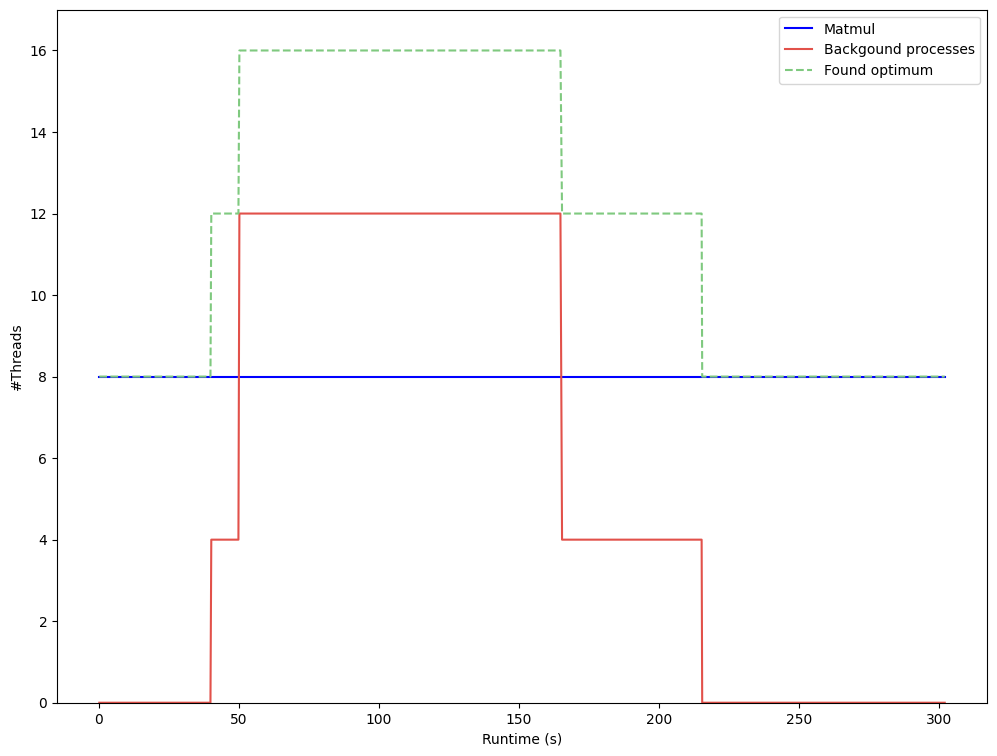

In [5]:
data = [(225498386, 224037175, 9160560, 8), (201019281, 200117996, 8741860, 8), (200937424, 203612285, 8728554, 8), (200982698, 200121811, 8738442, 8), (201004077, 200124472, 8771279, 8), (201175182, 200140985, 8773781, 8), (200925635, 203611218, 8784585, 8), (200968775, 200120217, 8780129, 8), (200907240, 200111707, 8782509, 8), (200875604, 200108373, 8773781, 8), (200960234, 203617563, 8788918, 8), (200855999, 200105999, 8750283, 8), (200989365, 200122707, 8809853, 8), (200896733, 200111355, 8746498, 8), (200862566, 200106801, 8793252, 8), (200962114, 203618403, 8781593, 8), (200951629, 200115216, 8782082, 8), (200898954, 200111975, 8787759, 8), (200907171, 200113054, 8774819, 8), (200955411, 203619098, 8785866, 8), (201016379, 200122709, 8798805, 8), (200857154, 200104561, 8797341, 8), (201035193, 200122516, 8780739, 8), (201042302, 203629917, 8784646, 8), (200884494, 200110327, 8791725, 8), (200894371, 200107656, 8790932, 8), (201023803, 200124668, 8786233, 8), (201008569, 203624080, 8798927, 8), (223861896, 221116276, 9542518, 8), (200909107, 200112476, 8780922, 8), (200941981, 200115448, 8800698, 8), (200913350, 200110837, 8797340, 8), (200971748, 200118383, 8782998, 8), (200893024, 203609971, 8796852, 8), (200966201, 200119181, 8790749, 8), (200879028, 200107712, 8790932, 8), (200951716, 200116406, 8787087, 8), (200904864, 203612222, 8802834, 8), (200949029, 200117688, 8808083, 8), (200869830, 200107869, 8766945, 8), (201006093, 200123887, 8813454, 8), (201207260, 203644267, 8986245, 8), (200927476, 200114461, 8796669, 8), (200906321, 200112959, 8785683, 8), (200928653, 200114686, 8800820, 8), (200884642, 203605714, 8789955, 8), (200883028, 200105900, 8774819, 8), (200929305, 200108635, 8830727, 8), (200832228, 200101175, 8763039, 8), (200887508, 200110619, 8794411, 8), (201114623, 203631227, 8805886, 8), (200839286, 200102852, 8804360, 8), (200927795, 200114526, 8793861, 8), (200942368, 200117337, 8805703, 8), (200910591, 203611799, 8800209, 8), (200908888, 200108369, 8783913, 8), (201010935, 200122155, 8786050, 8), (201061409, 200132332, 8805946, 8), (201036682, 203629199, 8823098, 8), (200956028, 200119152, 8781655, 8), (234663344, 231629271, 9947545, 8), (200982604, 200116909, 8791115, 8), (201004984, 200124285, 8805276, 8), (201031971, 200127426, 8849220, 8), (201085751, 203634678, 8762795, 8), (201013358, 200123523, 8845436, 8), (201034865, 200126955, 8793862, 8), (201113538, 200137187, 8805214, 8), (201077997, 203633912, 8823098, 8), (201007537, 200125011, 8811989, 8), (201015879, 200123817, 8813210, 8), (200965654, 200117353, 8805458, 8), (200867590, 203606913, 8811196, 8), (200975642, 200119714, 8796914, 8), (200911972, 200111164, 8796059, 8), (200911338, 200111757, 8781410, 8), (200929013, 203612923, 8832314, 8), (200966240, 200119824, 8794533, 8), (200885309, 200109498, 8800210, 8), (200988641, 200122725, 8828895, 8), (201015431, 200125223, 8821267, 8), (200960906, 203612866, 8793923, 8), (200908814, 200113273, 8822426, 8), (200939337, 200115959, 8799660, 8), (200930072, 200115886, 8833412, 8), (200845885, 203603043, 8804909, 8), (200985703, 200120504, 8790566, 8), (200889345, 200109683, 8813210, 8), (200939603, 200116391, 8820290, 8), (200926861, 203615022, 8803750, 8), (200942400, 200115620, 8823280, 8), (200889320, 200107382, 8812234, 8), (201047977, 200130680, 8789833, 8), (201004225, 203625167, 8838417, 8), (201016086, 200126632, 8816262, 8), (200930898, 200113015, 8766457, 8), (200983506, 200117646, 8807717, 8), (201039935, 203629800, 8852699, 8), (201011163, 200124711, 8802285, 8), (200993779, 200122960, 8854774, 8), (200921204, 200112255, 8818703, 8), (201053751, 203623908, 8811745, 8), (203288276, 200410369, 8931557, 8), (201158436, 203643691, 8808205, 8), (200974135, 200120806, 8802834, 8), (204887275, 204110218, 9123573, 8), (203377106, 203918143, 9122840, 8), (200933630, 200115236, 8787209, 8), (201000409, 200123472, 8819253, 8), (200967781, 203619678, 8821571, 8), (200889172, 200109096, 8829262, 8), (201020061, 200125623, 8829690, 8), (200960950, 200115811, 8815590, 8), (201029536, 203626685, 8820412, 8), (200927687, 200113857, 8804421, 8), (200927522, 200113068, 8805458, 8), (201028214, 200122584, 8825417, 8), (200974779, 203619867, 8801674, 8), (200987010, 200120579, 8818581, 8), (200977295, 200116964, 8795266, 8), (201000929, 200122491, 8808205, 8), (201071476, 203627906, 8808083, 8), (201051848, 200128550, 8826881, 8), (201038520, 200126605, 8803139, 8), (221432913, 221126791, 9499122, 8), (201053968, 200130266, 8823585, 8), (201058808, 200129519, 8840005, 8), (201077540, 200131333, 8818153, 8), (201089936, 203635269, 8810281, 8), (201104861, 200134020, 8797401, 8), (201031800, 200128567, 8807412, 8), (201068984, 200128340, 8833290, 8), (200896891, 203609364, 8824563, 8), (200977726, 200119481, 8796974, 8), (200941068, 200114027, 8818825, 8), (200995933, 200120323, 8815285, 8), (201098875, 203635981, 8812173, 8), (200928120, 200115271, 8823402, 8), (200919665, 200113430, 8813515, 8), (201101315, 200133470, 8799721, 8), (200899317, 203610359, 8802468, 8), (200970921, 200114543, 8796425, 8), (200944387, 200116325, 8815652, 8), (200898167, 200110639, 8804359, 8), (200907061, 203611096, 8762124, 8), (200920367, 200112494, 8795998, 8), (200896195, 200109566, 8866615, 8), (201037767, 200128795, 8801431, 8), (200918621, 200113993, 8810646, 8), (200934842, 203610254, 8828896, 8), (200971084, 200120463, 8834206, 8), (200900346, 200109213, 8802162, 8), (200881597, 200108534, 8821938, 8), (200864966, 203605932, 8833229, 8), (201053897, 200129655, 8832497, 8), (201000192, 200122057, 8786477, 8), (200890501, 200109149, 8820046, 8), (200902782, 203610528, 8796730, 8), (200944101, 200117075, 8814309, 8), (200966280, 200118623, 8821449, 8), (200945203, 200113760, 8822792, 8), (201021406, 203624291, 8821755, 8), (200898075, 200109794, 8778664, 8), (200902454, 200112377, 8859353, 8), (201003130, 200121729, 8778786, 8), (200858850, 200105718, 8862221, 8), (200958116, 203618232, 8790382, 8), (200969188, 200118555, 8808083, 8), (200876904, 200107840, 8825051, 8), (201300198, 200159693, 8802651, 8), (201055040, 203631196, 8858070, 8), (201092955, 200132556, 8819985, 8), (201056924, 200130170, 8812478, 8), (200945661, 203614727, 8776894, 8), (200951194, 200117360, 8840187, 8), (200962752, 200117990, 8757546, 8), (200966339, 200120340, 8824990, 8), (200964856, 200120265, 8814369, 8), (200909977, 203610720, 8872292, 8), (200935613, 200114135, 8800759, 8), (200869894, 200103293, 8824440, 8), (200891818, 200111153, 8821327, 8), (200952014, 203618647, 8836465, 8), (200921071, 200111817, 8806557, 8), (201159383, 200140981, 8849403, 8), (201151971, 200139146, 8827919, 8), (201062451, 203630366, 8838113, 8), (200896602, 200109602, 8825050, 8), (200926419, 200114167, 8829079, 8), (200954297, 200117029, 8836586, 8), (201159629, 203644030, 8989235, 8), (200986330, 200119027, 8819436, 8), (200903792, 200112208, 8852821, 8), (200967217, 200117883, 8823525, 8), (200898579, 203608169, 8816445, 8), (200900703, 200108718, 8846046, 8), (200957405, 200119267, 8825173, 8), (200923163, 200115035, 8811562, 8), (296262373, 296027324, 13376919, 8), (365318256, 367652875, 16571064, 8), (373576941, 372195805, 17042619, 8), (365872723, 367726994, 16620380, 8), (347066472, 344379875, 15735556, 8), (373732100, 375713991, 16976091, 8), (368048658, 367995409, 16761798, 8), (348242156, 348026860, 15785238, 8), (373620786, 372195884, 17018084, 8), (368355001, 368041298, 16753803, 8), (348812681, 351599135, 15834920, 8), (373772224, 372216035, 16995379, 8), (368147490, 368010252, 16777056, 8), (348855283, 348105971, 15811850, 8), (369092699, 371631007, 16801104, 8), (350225395, 348275129, 16045735, 8), (314080098, 315758744, 14353479, 8), (346435895, 344298918, 15932516, 8), (317817401, 319723918, 14472192, 8), (325736949, 324216247, 14955528, 8), (334312354, 335784956, 15281516, 8), (308707151, 308087888, 14107630, 8), (346321997, 344289247, 15923604, 8), (316861741, 319601249, 14490991, 8), (342641261, 340321936, 15781759, 8), (321359484, 323669739, 14644859, 8), (313604373, 312196253, 14342249, 8), (344436634, 344051590, 15786703, 8), (311174895, 311894978, 14233240, 8), (347117262, 336416944, 16570880, 8), (506911789, 416205871, 23367738, 8), (587993534, 517125608, 26381524, 8), (625552175, 530448696, 27644583, 8), (602433325, 470408380, 27464651, 8), (427248239, 333402979, 19947336, 8), (476745540, 374084231, 22500431, 8), (473605537, 372413326, 22059209, 8), (438421412, 349298680, 21139961, 8), (469461586, 368986061, 21475348, 8), (474481965, 391442947, 22254520, 8), (392318431, 325033606, 18393629, 8), (479665607, 405429605, 22299321, 8), (451994173, 380092770, 21170478, 8), (508614381, 422813208, 23862976, 8), (459373248, 352862320, 21569403, 8), (528800901, 403881835, 24940427, 8), (499185763, 394179708, 22709902, 8), (466279402, 366279693, 22020817, 8), (458551635, 378062757, 20694833, 8), (595147789, 490208093, 27625478, 8), (497670806, 399198871, 22379277, 8), (470355226, 413280732, 21491216, 8), (544277111, 423836958, 24817686, 8), (597275980, 427141567, 28047475, 8), (574420446, 490288457, 26349053, 8), (551959762, 427334651, 25853938, 8), (483990838, 387089005, 22173344, 8), (505747398, 398113410, 23158694, 8), (576249801, 467829882, 26440850, 8), (521987945, 454695327, 24246520, 8), (563966804, 415498232, 25562068, 8), (572029535, 470496173, 25976740, 8), (534172293, 422648632, 25000119, 8), (494538687, 387179944, 22527774, 8), (389982754, 341673975, 18011795, 8), (577238944, 460042328, 25947931, 8), (511991033, 390913527, 22289188, 8), (488038199, 367087281, 22923220, 8), (485636822, 399164676, 22412357, 8), (522303010, 429196361, 24004821, 8), (419991379, 357173178, 18208816, 8), (515994419, 411361550, 23757751, 8), (470447470, 384242807, 21565008, 8), (472349409, 371028357, 22423648, 8), (493181735, 382649491, 22550602, 8), (476610725, 369296575, 22722598, 8), (543882414, 461176914, 24882382, 8), (555703857, 476836004, 25588070, 8), (463807116, 363467852, 21751226, 8), (487951931, 395005881, 22018620, 8), (463992144, 376981194, 21383613, 8), (591399563, 493407231, 27280143, 8), (492233153, 399017076, 22628604, 8), (517795103, 410579612, 24519773, 8), (555322905, 428630794, 25775447, 8), (527216510, 404625049, 23937256, 8), (551988335, 433659298, 25314755, 8), (487993355, 389689565, 22048833, 8), (603991171, 488497029, 27808523, 8), (480035480, 362497223, 22499820, 8), (467980702, 380486946, 21027961, 8), (572021470, 441813017, 26539727, 8), (595932365, 466787206, 26828301, 8), (492040774, 398717025, 23394594, 8), (549649602, 481301459, 25247372, 8), (566295373, 453834551, 25973200, 8), (603992062, 491436689, 26884636, 8), (659991029, 558366477, 29920455, 8), (547993077, 422837716, 24394896, 8), (663990610, 486605066, 30120040, 8), (611998130, 472238190, 28592578, 8), (521017739, 433067115, 23899169, 8), (765941159, 623635563, 35275362, 8), (609060294, 474353400, 28276539, 8), (523970903, 440923567, 23914550, 8), (531971805, 405800917, 24222533, 8), (511986644, 409884272, 22540714, 8), (615994840, 509008407, 28175587, 8), (620051138, 503989533, 29334519, 8), (675652644, 571832770, 29078600, 8), (646567936, 550771217, 29773544, 8), (470840418, 412451202, 21328864, 8), (518890860, 454532354, 23665772, 8), (523950893, 449158389, 23882446, 8), (559990865, 420979101, 25199094, 8), (723992104, 619594577, 32846657, 8), (575995118, 468222301, 26623101, 8), (573474043, 426712637, 26296746, 8), (550510048, 425570376, 25268612, 8), (661228776, 522627892, 30810834, 8), (919749235, 759791471, 41106462, 8), (1103024359, 845275554, 48461180, 8), (1107968130, 883217873, 48358458, 8), (891071487, 695022608, 40640338, 8), (616909924, 507262959, 28044362, 8), (627997172, 518471445, 27984425, 8), (579990273, 486815593, 25861872, 8), (553048661, 448616671, 25925166, 8), (590934336, 447853476, 26115228, 8), (474347604, 391248376, 21614263, 8), (530162311, 406819009, 24157043, 8), (467472619, 412151643, 22191472, 8), (632026527, 513883981, 28599231, 8), (570550244, 464271725, 26338739, 8), (606369147, 465759427, 27898916, 8), (631029254, 472726477, 29160997, 8), (659987920, 492213102, 30148361, 8), (587996865, 444833564, 26057795, 8), (575989944, 453274056, 26343439, 8), (675988056, 490494207, 29730636, 8), (638322085, 450568030, 30130966, 8), (609718657, 489920420, 28259571, 8), (667944001, 505047475, 30481062, 8), (699991681, 506715444, 30571821, 8), (699993336, 554874352, 31880106, 8), (532885402, 455121947, 23751160, 8), (691097956, 560362490, 31461223, 8), (619995259, 468966978, 28786608, 8), (492021593, 406816881, 22373477, 8), (582155517, 463673728, 27393485, 8), (475174095, 389396196, 21355292, 8), (598620957, 503072180, 27244681, 8), (612025953, 497275935, 28091603, 8), (607213527, 501736362, 27865102, 8), (595058362, 452866482, 27037467, 8), (478806224, 362321383, 21497320, 8), (532755681, 403085979, 24780210, 8), (577244303, 430211103, 26093989, 8), (656886876, 473077233, 31163311, 8), (659982161, 477443269, 29544419, 8), (567347933, 439383879, 26673028, 8), (596608120, 515068968, 26685844, 8), (623987229, 513517206, 28594531, 8), (635993431, 507269671, 28372242, 8), (623991439, 479961402, 28062123, 8), (579988707, 437928833, 25992426, 8), (534918827, 444134664, 24784666, 8), (627601791, 482582260, 28906237, 8), (713506551, 512676628, 33032813, 8), (575948433, 442885356, 26299615, 8), (607987123, 460001499, 26771965, 8), (591995537, 472771550, 27451102, 8), (591993387, 435812313, 25851069, 8), (543992358, 427064000, 24897397, 8), (639988577, 515478281, 28950915, 8), (543990738, 439730490, 25498714, 8), (604040812, 446968652, 27808584, 8), (535948602, 434206407, 24395506, 8), (567988489, 428482352, 26252862, 8), (553636510, 423185433, 25424251, 8), (542394294, 440240402, 25155575, 8), (583522207, 488339567, 26390375, 8), (678756171, 513225599, 31217449, 8), (629657238, 487866629, 28726367, 8), (615991713, 462607961, 28041738, 8), (584035208, 485932046, 26517998, 8), (624572073, 511256703, 28605457, 8), (651301407, 519595802, 30033065, 8), (712063963, 529312841, 32248147, 8), (719989303, 580494775, 30283858, 8), (800013491, 621917956, 35416779, 8), (485445329, 392955809, 21854559, 8), (590520533, 483163749, 26961234, 8), (543992485, 434718565, 24786069, 8), (652032633, 545792654, 30184249, 8), (647952740, 523621611, 29485886, 8), (426340762, 357784078, 19818186, 8), (580652528, 462575855, 27257011, 8), (564981942, 438105350, 26199090, 8), (607995983, 470403944, 27829153, 8), (508038146, 445038261, 24029296, 8), (481850049, 418225328, 22914981, 8), (589635645, 480689589, 26903312, 8), (716446741, 592539036, 32091043, 8), (648007025, 490498163, 30221297, 8), (754049965, 589237667, 35096712, 8), (554237954, 432732895, 26197138, 8), (728742174, 557606940, 31959024, 8), (725536665, 574435486, 30826215, 8), (749683112, 616129997, 32260843, 8), (831720625, 648038157, 36088775, 8), (733325993, 587159646, 32172891, 8), (727341306, 592840701, 30984967, 8), (710950622, 555261348, 31051679, 8), (724350403, 550521489, 30551252, 8), (737647830, 543622954, 32723732, 8), (602315538, 450697215, 26747918, 8), (535898362, 407223561, 24577207, 8), (684082985, 550486292, 30621626, 8), (515993609, 450841257, 23715150, 8), (495994876, 429431580, 22318302, 8), (628031325, 470968786, 29012010, 8), (723951520, 591056963, 33511938, 8), (587996310, 460892354, 26703667, 8), (700021827, 534519751, 32605080, 8), (588261544, 479968144, 27437674, 8), (577352500, 474580111, 26266473, 8), (379195743, 379898688, 17022174, 8), (378447018, 376303089, 17034929, 8), (379116121, 379884436, 17025103, 8), (378283089, 379782148, 16975848, 8), (378867045, 376349999, 17077959, 8), (378888230, 379860661, 17004473, 8), (378468607, 379808095, 17034319, 8), (378542592, 376316246, 16981524, 8), (378600830, 379817347, 17036211, 8), (375845652, 375976911, 16893207, 8), (377952946, 376238133, 16915911, 8), (378231864, 379778545, 17049211, 8), (378481430, 379808680, 16935565, 8), (379798121, 379971896, 17086687, 8), (377580162, 376195672, 16951129, 8), (378181573, 379768093, 17000933, 8), (378086292, 376260542, 16877947, 8), (384080149, 384005736, 17305315, 8), (382302852, 383781286, 17140398, 8), (380159053, 380015950, 17097795, 8), (383506909, 383935841, 17219988, 8), (377195127, 376145442, 16984393, 8), (378380762, 376295995, 16909868, 8), (401576306, 403694936, 17966995, 8), (378322864, 376287847, 16947711, 8), (376402276, 379544887, 16938921, 8), (378516397, 376311855, 16812396, 8), (379261911, 379907591, 17080401, 8), (378457954, 379805528, 16947955, 8), (378255014, 376273194, 17040911, 8), (377583153, 379696344, 16902239, 8), (378813308, 376346957, 17014544, 8), (378615242, 379826479, 16991717, 8), (378831867, 379852857, 17093462, 8), (377773405, 376220063, 16894610, 8), (384047989, 384004250, 17328141, 8), (377517459, 376186368, 16880084, 8), (379125751, 379888417, 17057879, 8), (377675031, 379707015, 16846453, 8), (379440949, 379921385, 17090838, 8), (377186080, 376145088, 16871173, 8), (380922084, 380110328, 17056291, 8), (378624353, 379826451, 16929400, 8), (378769924, 376344825, 17081561, 8), (378320603, 379788737, 16962908, 8), (378387948, 379796158, 16676654, 8), (378784203, 376345973, 17121965, 8), (379159413, 379890574, 16644855, 8), (384246505, 384027425, 17408586, 8), (379209795, 379899177, 16524432, 8), (377946071, 376235098, 17172930, 8), (403073134, 403879861, 17642228, 8), (377983719, 379744305, 17185625, 8), (378823089, 376352290, 16528888, 8), (378545336, 379814258, 17231523, 8), (378028792, 379753311, 16461079, 8), (377744104, 376216573, 17222124, 8), (378719453, 379835778, 16408344, 8), (387658228, 387956904, 17708390, 8), (378110069, 376261536, 16396869, 8), (379058599, 379874776, 17453996, 8), (377897691, 376235848, 16368366, 8), (378626483, 379818685, 17318926, 8), (378915309, 379862798, 16482074, 8), (378214879, 376274710, 17301958, 8), (378275531, 379782640, 16469135, 8), (378919960, 379863855, 17294450, 8), (377787907, 376219462, 16527241, 8), (378127030, 379758652, 17203813, 8), (379369120, 376420825, 16668109, 8), (378840127, 379852549, 17144427, 8), (378536844, 379809145, 16715533, 8), (377738715, 376216178, 17007647, 8), (378148979, 379763199, 16759845, 8), (378227668, 376277892, 16868060, 8), (378859278, 379849710, 16908953, 8), (378835074, 379853653, 16795184, 8), (378110364, 376259665, 16970599, 8), (378423209, 379794604, 16681598, 8), (378181089, 376272284, 17070818, 8), (379132878, 379891340, 16663531, 8), (377973275, 379740211, 17165423, 8), (379542534, 379939960, 16517902, 8), (419681076, 414758201, 18734815, 8), (379239163, 376404561, 16763263, 8), (379297281, 379910092, 17067583, 8), (378910395, 379862494, 16684894, 8), (379264660, 379907769, 17158952, 8), (377474667, 376182351, 16490986, 8), (379287803, 379900896, 17250505, 8), (377734099, 376213719, 16466022, 8), (382756978, 383842514, 17425737, 8), (378020829, 379743176, 16418781, 8), (378804512, 376349196, 17263506, 8), (377666351, 379700224, 16381794, 8), (379207950, 376400307, 17341203, 8), (378123552, 379763122, 16427876, 8), (386714742, 387745986, 17710037, 8), (378133678, 376263678, 16528461, 8), (378937397, 379860414, 17289263, 8), (378613002, 379826307, 16620074, 8), (387875371, 387968402, 18114761, 8), (378275117, 376268822, 16909686, 8), (378434231, 379797989, 17660050, 8), (378279670, 376278227, 17030901, 8), (380043920, 379987394, 17707169, 8), (274405105, 275796821, 12838773, 8), (259192392, 259873463, 12256134, 8), (267499827, 267936857, 12525785, 8), (255408810, 252422047, 12104400, 8), (257041904, 259628586, 12069306, 8), (256867062, 256106887, 12204009, 8), (257037475, 256126351, 12126250, 8), (257397861, 259671437, 12213531, 8), (257227985, 256150079, 12088226, 8), (257214629, 256147278, 12176971, 8), (259984581, 259989862, 12230193, 8), (264617874, 264073630, 12533171, 8), (257380758, 259668695, 12063446, 8), (256806469, 256095905, 12210052, 8), (257073251, 256130399, 12086150, 8), (256992061, 256120653, 12219574, 8), (256890088, 259607708, 12077300, 8), (256817350, 256099667, 12195770, 8), (256695404, 256084405, 12029022, 8), (257013080, 256124920, 12191497, 8), (256734066, 256088298, 12098174, 8), (257637134, 259698082, 12194854, 8), (257253353, 256154459, 12073456, 8), (257991404, 259747418, 12210296, 8), (257467715, 256182461, 12129790, 8), (257611741, 256200175, 12197113, 8), (257247592, 259648460, 12094451, 8), (257391871, 256171896, 12214263, 8), (257125847, 256139257, 12116241, 8), (257196086, 259643498, 12153106, 8), (256936883, 256116793, 12085785, 8), (257130617, 256139708, 12190765, 8), (257293514, 259661127, 12149749, 8), (257698516, 256206821, 12163848, 8), (257566915, 256193235, 12144256, 8), (257652734, 259703453, 12178375, 8), (257395423, 256173253, 12136382, 8), (203866521, 203978934, 8650796, 8), (200624383, 200076848, 8914955, 8), (200653465, 200080300, 8958717, 8), (200607439, 203574301, 8936989, 8), (200630182, 200076471, 8929604, 8), (200620061, 200076033, 8946571, 8), (200606906, 200069833, 8961281, 8), (200591977, 200071094, 8874977, 8), (200571487, 200069877, 8945717, 8), (200592570, 200071073, 8957985, 8), (200638218, 203576906, 8945045, 8), (200641386, 200077308, 8956337, 8), (200654241, 200080282, 8919777, 8), (200613252, 200074719, 8964028, 8), (200638526, 200077391, 8951210, 8), (209346991, 211667594, 9342566, 8), (200970097, 200119099, 8964333, 8), (200775144, 200095044, 8953346, 8), (200675486, 200083480, 8945961, 8), (200640573, 200078133, 8928505, 8), (200648009, 203578272, 8965797, 8), (200618867, 200073532, 8917153, 8), (200668864, 200082747, 8945167, 8), (200607908, 200074517, 8924538, 8), (200593271, 200072033, 8948097, 8), (200619728, 200074354, 8953407, 8), (200634536, 200073760, 8958290, 8), (200559619, 203567249, 8917397, 8), (200584165, 200069570, 8957741, 8), (200595273, 200072521, 8927772, 8), (200558168, 200066240, 8941078, 8), (200577880, 200070973, 8935586, 8), (200544133, 200065746, 8955848, 8), (200587840, 200071951, 8903847, 8), (200601113, 203571774, 8956703, 8), (200600871, 200072892, 8927956, 8), (200562928, 200069447, 8956764, 8), (200715274, 200087806, 8942299, 8), (200605201, 200074677, 8962868, 8), (200644614, 200078836, 8929542, 8), (200627287, 203576571, 8969948, 8), (200643479, 200078816, 8942604, 8), (200536795, 200065611, 8921303, 8), (200531154, 200065556, 8930702, 8), (200596137, 200073014, 8954018, 8), (200635369, 200078197, 8953346, 8), (200635163, 200073866, 8911537, 8), (200627767, 203576105, 8953041, 8), (200549013, 200066029, 8924111, 8), (200549023, 200066960, 8967689, 8), (200536805, 200063418, 8951271, 8), (200618437, 200075552, 8929848, 8), (200556809, 200066885, 8965126, 8), (200571564, 200069746, 8902992, 8), (200632708, 203576900, 8973244, 8), (200590308, 200071998, 8946144, 8), (200568016, 200069602, 8922645, 8), (200569639, 200069905, 8964272, 8), (200621919, 200071907, 8917152, 8), (200666063, 200081020, 8961647, 8), (200641070, 203577773, 8958168, 8), (200621294, 200075010, 8924904, 8), (200571861, 200068976, 8963417, 8), (200586942, 200071674, 8904213, 8), (200575284, 200068681, 8962075, 8), (200587563, 200069736, 8969276, 8), (200519762, 200061302, 8922646, 8), (200537242, 203565530, 8949317, 8), (200592451, 200071692, 8932106, 8), (200564670, 200066721, 8957375, 8), (200646674, 200076514, 8917641, 8), (200561629, 200068252, 8961464, 8), (200501129, 200060710, 8960243, 8), (200638075, 200079301, 8933265, 8), (200610044, 203574366, 8964394, 8), (200571705, 200070278, 8924355, 8), (200583240, 200070264, 8946327, 8), (200524523, 200064671, 8928200, 8), (200528624, 200064259, 8960548, 8), (200597456, 200072309, 8947365, 8), (200529373, 200062955, 8934974, 8), (200709792, 203587697, 8950844, 8), (201007722, 200124294, 8961830, 8), (200841363, 200104014, 8954262, 8), (200591228, 200071767, 8942604, 8), (200657913, 200077513, 8927406, 8), (200532819, 200063589, 8974953, 8), (200581107, 203571857, 8931923, 8), (200657072, 200081680, 8964455, 8), (200623637, 200073912, 8903846, 8), (200589901, 200069215, 8965310, 8), (200591631, 200071508, 8956275, 8), (200559424, 200067475, 8903847, 8), (200536915, 203566134, 8956215, 8), (200569338, 200069556, 8919228, 8), (200582917, 200072126, 8955787, 8), (200595794, 200073506, 8941750, 8), (200548823, 200066622, 8939613, 8), (200573280, 200069002, 8957131, 8), (200593650, 200072873, 8904640, 8), (200594071, 203569273, 8782875, 8), (200617648, 200074250, 8952248, 8), (200887634, 200107873, 8937416, 8), (200718409, 200088547, 8960732, 8), (200617578, 200075600, 8956581, 8), (200657836, 200077202, 8933815, 8), (200621101, 203575841, 8965797, 8), (200574485, 200070892, 8957191, 8), (200590058, 200071788, 8927956, 8), (200607679, 200073376, 8963905, 8), (200500035, 200059337, 8934121, 8), (200548484, 200066046, 8952369, 8), (200547754, 200062872, 8922097, 8), (200687233, 203583988, 8965553, 8), (200585211, 200071015, 8966407, 8), (200585931, 200072201, 8918130, 8), (200602385, 200073466, 8946327, 8), (200541818, 200065156, 8918129, 8), (200558146, 200066817, 8965675, 8), (200581563, 200067062, 8911965, 8), (200636890, 203574034, 8959083, 8), (200605759, 200073947, 8957985, 8), (200594120, 200072825, 8914955, 8), (200663376, 200080838, 8956032, 8), (200553048, 200067507, 8963417, 8), (200564827, 200065142, 8911964, 8), (200594069, 203572528, 8969887, 8), (200520221, 200063506, 8930580, 8), (200561147, 200067524, 8965126, 8), (200524617, 200063074, 8928322, 8), (200612290, 200072592, 8962929, 8), (200604739, 200073371, 8908607, 8), (200552124, 200066930, 8970619, 8), (200600795, 203572592, 8958413, 8), (200590919, 200071710, 8928444, 8), (200595648, 200073519, 8956214, 8), (200610722, 200073928, 8965493, 8), (200683853, 200084601, 8921425, 8), (200659819, 200078729, 8958717, 8), (200590411, 200070712, 8916237, 8), (200545762, 203565691, 8966774, 8), (200584013, 200072655, 8916664, 8), (200574878, 200069414, 8970131, 8), (200586470, 200072924, 8951820, 8), (203504140, 203935507, 9066322, 8), (233120410, 232133388, 10419956, 8), (211060353, 211881987, 9582312, 8), (204214475, 204017535, 9312537, 8), (205457942, 204177151, 9238563, 8), (204242463, 204025642, 9248329, 8), (205704811, 207708829, 9177771, 8), (200849656, 200105085, 8952004, 8), (200818427, 200098774, 8950661, 8), (200767884, 200090598, 8925209, 8), (200780231, 203591726, 8966468, 8), (200671936, 200082933, 8938942, 8), (200772399, 200096194, 8984047, 8), (200807832, 200097868, 8954994, 8), (200590697, 200072680, 8909951, 8), (200630309, 203573983, 8957496, 8), (200548985, 200058110, 8920021, 8), (200613065, 200075167, 8968544, 8), (200561251, 200067553, 8923134, 8), (200631663, 200076984, 8960488, 8), (211925280, 211988808, 9510900, 8), (205829922, 207721525, 9160377, 8), (200727095, 200088825, 8955117, 8), (200704541, 200084059, 8908607, 8), (200728251, 200088136, 8967262, 8), (200611781, 200071767, 8948342, 8), (200586385, 200070446, 8922035, 8), (200543534, 203566279, 8957436, 8), (200624164, 200076994, 8929359, 8), (200600840, 200073687, 8963539, 8), (200682516, 200082909, 8964760, 8), (200611880, 200074902, 8906410, 8), (200582504, 200071652, 8958412, 8), (200612512, 203572439, 8963906, 8), (200642076, 200079080, 8933570, 8), (200616902, 200071332, 8938576, 8), (200614921, 200075868, 8964089, 8), (200622095, 200076535, 8924842, 8), (200628708, 200076741, 8954995, 8), (200694195, 200084918, 8936378, 8), (200596518, 203573794, 8917641, 8), (200573236, 200065653, 8969581, 8), (200565609, 200069305, 8922707, 8), (200569766, 200068631, 8940285, 8), (200665890, 200082254, 8954445, 8), (200593365, 200069389, 8936378, 8), (200572293, 200071183, 8955910, 8), (200584966, 203572679, 8916969, 8), (200619932, 200073479, 8952187, 8), (200610854, 200074865, 8932533, 8), (200636403, 200079204, 8956398, 8), (200566895, 200070454, 8916054, 8), (200560895, 200069772, 8948463, 8), (200658613, 203579640, 8956398, 8), (201089001, 200133700, 8962868, 8), (200813116, 200096630, 8951149, 8), (200583674, 200072477, 8922829, 8), (200665531, 200081642, 8954505, 8), (200604826, 203574823, 8965493, 8), (200676550, 200079393, 8940956, 8), (200590001, 200073319, 8934303, 8), (200613780, 200071951, 8917763, 8), (200597408, 200073370, 8953529, 8), (200610682, 200075883, 8977150, 8), (200628552, 200073144, 8912514, 8), (200591033, 203572229, 8951027, 8), (200615130, 200076474, 8975258, 8), (200595043, 200073184, 8914222, 8), (200569376, 200070864, 8978127, 8), (200649426, 200076849, 8945411, 8), (200604146, 200074529, 8917580, 8), (200601386, 200074062, 8929909, 8), (200605849, 203574972, 8946144, 8), (200564414, 200066092, 8964821, 8), (200543135, 200063950, 8910377, 8), (200575622, 200070195, 8967568, 8), (200573500, 200069885, 8915382, 8), (200699435, 200084646, 8957192, 8), (200599438, 203573745, 8953346, 8), (200546070, 200066829, 8948402, 8), (200592108, 200072223, 8934487, 8), (200623924, 200071783, 8946632, 8), (200602261, 200073544, 8920021, 8), (200624528, 200074618, 8949928, 8), (200638086, 200075571, 8918801, 8), (200682169, 203582428, 8955604, 8), (200605811, 200075327, 8973976, 8), (200605351, 200075182, 8904702, 8), (200603715, 200074775, 8972023, 8), (200563979, 200067128, 8940895, 8), (200631436, 200077615, 8937111, 8), (206645340, 207829567, 9222632, 8), (210712832, 211836997, 9541663, 8), (201230680, 200149308, 8984047, 8), (200788226, 200093605, 8949257, 8), (200803579, 200097878, 8919166, 8), (200729904, 203590700, 8960365, 8), (200690345, 200085973, 8943825, 8), (200727218, 200089163, 8956520, 8), (200708310, 200085727, 8938210, 8), (200641671, 200074010, 8951881, 8), (200697493, 200083050, 8924660, 8), (200641041, 203574457, 8953590, 8), (200626577, 200075086, 8943215, 8), (200539920, 200062571, 8929786, 8), (200558514, 200069378, 8960488, 8), (200615646, 200070770, 8915870, 8), (200632984, 200078455, 8971840, 8), (200555192, 203568450, 8951943, 8), (200592114, 200069895, 8948890, 8), (200527099, 200064916, 8933937, 8), (200626452, 200076342, 8913674, 8), (200585745, 200071026, 8954201, 8), (200600425, 200072395, 8948463, 8), (200601514, 200071584, 8923744, 8), (200627007, 203575004, 8967079, 8), (200570625, 200069759, 8940773, 8), (200582689, 200071707, 8923317, 8), (200601951, 200072975, 8977944, 8), (200602075, 200073290, 8939857, 8), (201175771, 200142071, 8955849, 8), (200658235, 203581836, 8929115, 8), (200609943, 200075898, 8950661, 8), (200573826, 200071210, 8923195, 8), (200584381, 200069385, 8961342, 8), (200665026, 200080737, 8952796, 8), (200580229, 200071851, 8870034, 8), (200556910, 203569119, 8959999, 8), (200602074, 200073448, 8912209, 8), (200652064, 200077270, 8964881, 8), (200573583, 200070715, 8950539, 8), (200593143, 200072842, 8907753, 8), (200732352, 200090844, 8968056, 8), (200667064, 200082430, 8954200, 8), (200666375, 203580953, 8914040, 8), (200534100, 200060565, 8951332, 8), (200591988, 200073710, 8921852, 8), (200539130, 200066271, 8964089, 8), (200574704, 200071548, 8915443, 8), (200577430, 200069702, 8955971, 8), (200610993, 203571133, 8956642, 8), (200614199, 200075517, 8943947, 8), (200566297, 200068455, 8924232, 8), (200510913, 200060942, 8917092, 8), (200597647, 200071444, 8959694, 8), (200571482, 200067093, 8937233, 8), (200561426, 200069151, 8934486, 8), (200584217, 203572682, 8956276, 8), (200539324, 200066361, 8918251, 8), (200546010, 200064135, 8960793, 8), (200524947, 200063712, 8949745, 8), (200538483, 200065657, 8933510, 8), (200502854, 200061025, 8916664, 8), (200529581, 200063131, 8950538, 8), (200559555, 200067494, 8909646, 8), (200539207, 203561867, 8951637, 8), (200612902, 200075133, 8968361, 8), (200599829, 200072214, 8919960, 8), (200519970, 200062573, 8953651, 8), (200566534, 200068649, 8919899, 8), (200605304, 200070883, 8958534, 8), (200569140, 200068835, 8906838, 8), (200578771, 203571042, 8971962, 8), (200547166, 200065984, 8952125, 8), (200543203, 200064181, 8916664, 8), (200625342, 200076422, 8961098, 8), (200606355, 200073358, 8905922, 8), (200562063, 200069928, 8928505, 8), (200589341, 200072358, 8948403, 8), (207475166, 207930597, 9233069, 8), (202490113, 203810079, 9072670, 8), (201132765, 200139290, 8970985, 8), (200781803, 200096819, 8921242, 8), (200684119, 203580959, 8951820, 8), (200578806, 200069216, 8947060, 8), (200556020, 200066383, 8922951, 8), (200523580, 200063076, 8952980, 8), (200601300, 200074229, 8922401, 8), (200602596, 200073658, 8965675, 8), (200597061, 200069720, 8947670, 8), (200689471, 203580680, 8952492, 8), (200674676, 200082975, 8917763, 8), (200639650, 200076389, 8948097, 8), (200650951, 200076656, 8926796, 8), (200644839, 200077503, 8946022, 8), (200569362, 200067349, 8929054, 8), (200550255, 203567423, 8947365, 8), (200582577, 200070660, 8943276, 8), (200586305, 200071103, 8931740, 8), (200554386, 200066046, 8959632, 8), (200667855, 200082488, 8918435, 8), (200607382, 200074233, 8937233, 8), (200538800, 200065501, 8923622, 8), (200598844, 203572267, 8945595, 8), (200606165, 200073234, 8954811, 8), (200678522, 200079637, 8959144, 8), (200605791, 200073346, 8920571, 8), (200613903, 200075057, 8946693, 8), (200631406, 200077735, 8928444, 8), (200561755, 203566960, 8964516, 8), (200585987, 200068291, 8914772, 8), (200572010, 200069797, 8951637, 8), (200598879, 200073257, 8955482, 8), (200598240, 200072248, 8921120, 8), (200573128, 200069728, 8955544, 8), (200604878, 200072534, 8921058, 8), (200581136, 203570277, 8953957, 8), (200615937, 200076435, 8959999, 8), (200592993, 200073010, 8906837, 8), (200638094, 200075057, 8962197, 8), (200578070, 200070996, 8953285, 8), (200604449, 200073529, 8915016, 8), (200612206, 203574912, 8965065, 8), (200590389, 200070524, 8904518, 8), (200580617, 200070807, 8963783, 8), (200601220, 200071991, 8942666, 8), (200571706, 200068169, 8924903, 8), (200570327, 200069060, 8952492, 8), (200552969, 200068013, 8919472, 8), (200551418, 203566497, 8951942, 8), (200574499, 200066639, 8905495, 8), (200553947, 200068872, 8961525, 8), (200587238, 200068411, 8918617, 8), (200600205, 200074104, 8956704, 8), (200609980, 200072308, 8953773, 8), (200587885, 200069498, 8916237, 8), (200568023, 203568144, 8957802, 8), (200615716, 200075273, 8904152, 8), (200599650, 200073533, 8971534, 8), (200597620, 200071073, 8961769, 8), (200628176, 200076277, 8946938, 8), (200629411, 200077143, 8931129, 8), (200588734, 200072471, 8940712, 8), (200606761, 203572720, 8922219, 8), (200574977, 200069669, 8948097, 8), (200578150, 200070564, 8915810, 8), (200615506, 200075411, 8965858, 8), (200588426, 200069471, 8948952, 8), (200614531, 200074449, 8917213, 8), (200586881, 203571019, 8970192, 8), (200581283, 200067978, 8906777, 8), (200577615, 200071771, 8968849, 8), (200616547, 200074400, 8949440, 8), (200627071, 200075201, 8933021, 8), (200603363, 200073384, 8942543, 8), (200632727, 200075828, 8955300, 8), (200617839, 203576206, 8923866, 8), (200608144, 200073657, 8954994, 8), (200563993, 200068258, 8902565, 8), (200571121, 200068974, 8953102, 8), (200580065, 200071388, 8916604, 8), (200608032, 200074813, 8952613, 8), (200583075, 200072137, 8914528, 8), (200576932, 203568681, 8952736, 8), (200615620, 200074376, 8964638, 8), (200624663, 200072790, 8942543, 8), (200613429, 200076329, 8913551, 8), (200601688, 200073699, 8957863, 8), (200536135, 200065712, 8930580, 8), (200570081, 203569334, 8951271, 8), (200610187, 200071380, 8954811, 8), (200580481, 200071038, 8924294, 8), (200556124, 200068349, 8917763, 8), (200557520, 200067150, 8942238, 8), (200573953, 200068764, 8956459, 8), (200614116, 200072786, 8925148, 8), (200527278, 203565354, 8955055, 8), (200563042, 200069925, 8917396, 8), (200631870, 200075833, 8938149, 8), (200552316, 200066743, 8929359, 8), (200575537, 200070811, 8939553, 8), (200548710, 200067635, 8963234, 8), (200602956, 200073791, 8915260, 8), (200601426, 203573026, 8945656, 8), (200559079, 200067057, 8956703, 8), (200555727, 200066820, 8924110, 8), (200577510, 200070335, 8918923, 8), (200606907, 200074902, 8969154, 8), (200666718, 200081664, 8946022, 8), (200602917, 200073999, 8954567, 8), (200560395, 203565504, 8916847, 8), (200587651, 200071271, 8964028, 8), (200593498, 200072065, 8932960, 8), (200569405, 200068661, 8952675, 8), (200596776, 200070442, 8908913, 8), (200597822, 200073014, 8963417, 8), (200568200, 200069381, 8932899, 8), (200936844, 203615974, 8988198, 8)]
plot('Fixed at 8 threads', data, 175246, 115294)
plt.show()

Energy: 13996.39J, Runtime: 303.25s


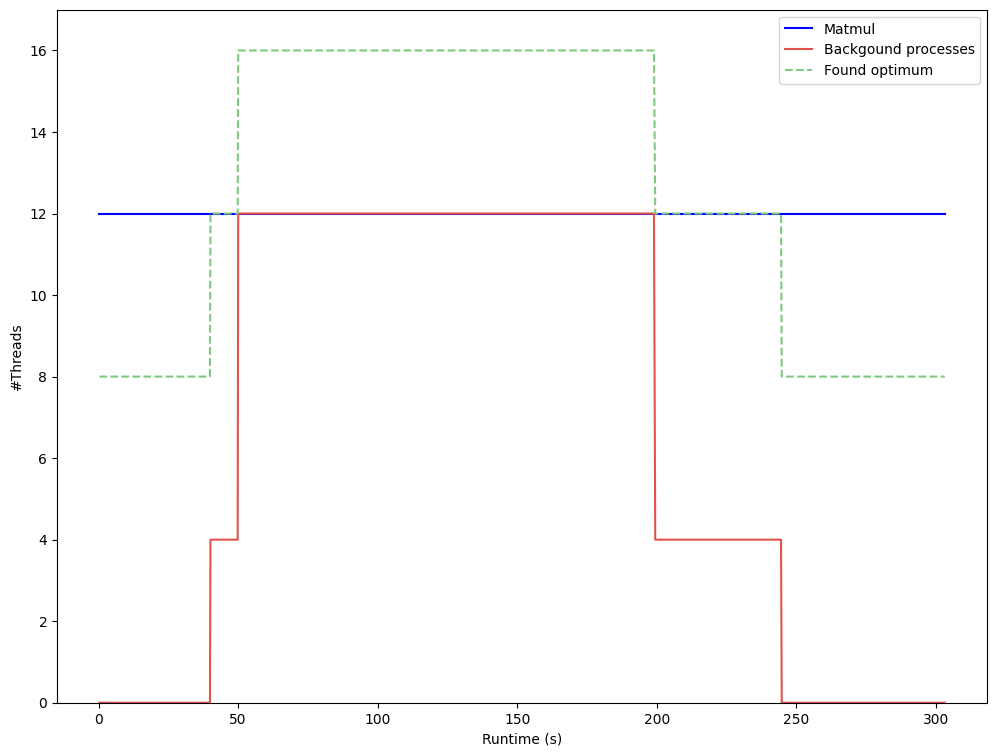

In [6]:
data = [(255589430, 255703935, 11042818, 12), (253081977, 252084256, 11016330, 12), (251590342, 251965353, 10960787, 12), (253740653, 252143184, 11061068, 12), (181855361, 183814702, 8429727, 12), (181325595, 180107319, 8397622, 12), (181296510, 180104964, 8392740, 12), (181054083, 183754093, 8429971, 12), (180401646, 180033068, 8382974, 12), (181273537, 180102441, 8397012, 12), (181481301, 183787291, 8457437, 12), (180033436, 180002162, 8366251, 12), (181502084, 180124267, 8434121, 12), (181237373, 180101493, 8416300, 12), (181394621, 183782454, 8447732, 12), (179381421, 176279867, 8362588, 12), (178317233, 179858399, 8334757, 12), (181830134, 180149676, 8399148, 12), (181319483, 183775452, 8437662, 12), (180390410, 180032100, 8403237, 12), (180626297, 180048735, 8418741, 12), (181683979, 180139400, 8393289, 12), (181073528, 183750361, 8471475, 12), (181690350, 180140239, 8403238, 12), (181879366, 183815699, 8418496, 12), (181460224, 180120485, 8388407, 12), (181646971, 180135006, 8460061, 12), (181289671, 183768510, 8457681, 12), (219189760, 216628716, 9819616, 12), (180116481, 180009360, 8381448, 12), (179772630, 176313875, 8394205, 12), (181452089, 183783986, 8417215, 12), (181701593, 180138729, 8436868, 12), (181738844, 183810740, 8375405, 12), (181314656, 180108912, 8416971, 12), (181348868, 180111104, 8408670, 12), (181903593, 183824753, 8432535, 12), (181608013, 180131683, 8412393, 12), (181460806, 183787843, 8449746, 12), (180144268, 180007790, 8382608, 12), (204681589, 204055835, 9328040, 12), (181857265, 180154461, 8436807, 12), (181320465, 183775668, 8382852, 12), (181391436, 180114977, 8469705, 12), (181341461, 180106071, 8404580, 12), (181567567, 183796275, 8420999, 12), (181847620, 180111333, 8589273, 12), (181944021, 183824494, 8415689, 12), (179716285, 179972921, 8340249, 12), (181569929, 180128410, 8431070, 12), (181805995, 180146202, 8387064, 12), (181110985, 183758662, 8435037, 12), (179556526, 179962358, 8352517, 12), (181995685, 180165726, 8428018, 12), (181508233, 180123176, 8470804, 12), (181196431, 183765767, 8394998, 12), (181059503, 180087692, 8375772, 12), (182130223, 183837568, 8559792, 12), (181748247, 180142138, 8542459, 12), (180124729, 180007068, 8386392, 12), (225857199, 224054223, 10076146, 12), (181322786, 180103364, 8414346, 12), (180637778, 180051826, 8373148, 12), (180894920, 180074020, 8406228, 12), (181107714, 183757759, 8439371, 12), (179371978, 176280404, 8324502, 12), (181340866, 183770988, 8392618, 12), (181870045, 180153458, 8456033, 12), (180967389, 180078170, 8384012, 12), (181655432, 183802629, 8449258, 12), (180374099, 180029218, 8415140, 12), (180257972, 180020560, 8365091, 12), (179823580, 179981828, 8367898, 12), (180830487, 180059932, 8411294, 12), (183531403, 183960587, 8538064, 12), (177937683, 179825980, 8338358, 12), (180644946, 180047162, 8399820, 12), (181798439, 180148430, 8449197, 12), (180349330, 180028626, 8360330, 12), (181689087, 183805156, 8473611, 12), (181698695, 180135412, 8462503, 12), (181798556, 183809142, 8483682, 12), (181721627, 180142764, 8409951, 12), (181540869, 180125041, 8438028, 12), (181618243, 183800923, 8424295, 12), (181670848, 180138822, 8404703, 12), (181666054, 183804200, 8433633, 12), (181832684, 180150316, 8465493, 12), (178463783, 179865755, 8270304, 12), (177368853, 176113695, 8316385, 12), (180269650, 180020167, 8413186, 12), (180163181, 180013025, 8411905, 12), (181552475, 180126006, 8454568, 12), (181724217, 183808946, 8445413, 12), (181936034, 180157231, 8476602, 12), (181467593, 183787910, 8484536, 12), (180242019, 180019810, 8382669, 12), (181915737, 180158368, 8490457, 12), (181708102, 183808141, 8465066, 12), (181826384, 180150940, 8445108, 12), (181820676, 183817857, 8515176, 12), (181319779, 180107223, 8464700, 12), (181442437, 180119820, 8444131, 12), (180192990, 180011788, 8408914, 12), (181701213, 183804768, 8476968, 12), (181968519, 180160327, 8468485, 12), (181446015, 183785923, 8493081, 12), (181719723, 180142107, 8445596, 12), (180185610, 180012137, 8414712, 12), (181765545, 183811798, 8468668, 12), (180194157, 180008225, 8418435, 12), (181741367, 180144511, 8472146, 12), (181379930, 180114414, 8442300, 12), (181701675, 183807222, 8461466, 12), (180714658, 180056739, 8460122, 12), (181193431, 180098910, 8446756, 12), (181577854, 183795824, 8496316, 12), (181205691, 180100108, 8439187, 12), (181178125, 180097394, 8459085, 12), (180492424, 180039899, 8406839, 12), (181097451, 183756370, 8502114, 12), (181081275, 180089471, 8459940, 12), (181029506, 180085275, 8434792, 12), (181494116, 183790701, 8430155, 12), (215555969, 213001353, 9719945, 12), (181341831, 180109332, 8446878, 12), (181335975, 180110754, 8455789, 12), (181218275, 180099105, 8401224, 12), (181190346, 183765535, 8492410, 12), (181176677, 180097330, 8445168, 12), (181529908, 180124119, 8489664, 12), (181742841, 183810451, 8479653, 12), (181199745, 180093963, 8501749, 12), (181789632, 183815359, 8469155, 12), (181571554, 180130522, 8519754, 12), (180313994, 180024254, 8416909, 12), (181382892, 180112360, 8500589, 12), (181765719, 183813237, 8445718, 12), (181991992, 180162873, 8491372, 12), (181199522, 183765668, 8443155, 12), (181583448, 180131378, 8491739, 12), (181863878, 183819423, 8501260, 12), (181213007, 180066763, 8507668, 12), (181562603, 180126198, 8574258, 12), (180121362, 180009282, 8417703, 12), (181010440, 183749335, 8429666, 12), (181605198, 180132482, 8453470, 12), (181543651, 180125314, 8486855, 12), (181938393, 183826626, 8508157, 12), (181799807, 180145843, 8465616, 12), (180008121, 179997487, 8423989, 12), (181620593, 183801214, 8429544, 12), (179920259, 179991064, 8442361, 12), (181707653, 180139821, 8447306, 12), (181343091, 180105616, 8455911, 12), (181807783, 183816772, 8480447, 12), (180247665, 180020209, 8388894, 12), (179939161, 179993083, 8473123, 12), (180993574, 180079600, 8408731, 12), (181531737, 183793612, 8498757, 12), (181315374, 180106701, 8449136, 12), (181298464, 180107635, 8515604, 12), (181614061, 183800642, 8448403, 12), (181440984, 180117884, 8483804, 12), (180177827, 180012927, 8434610, 12), (181576474, 180131052, 8450052, 12), (181352536, 183778936, 8517068, 12), (181707214, 180141899, 8473672, 12), (180879354, 180072049, 8420572, 12), (179904631, 179988299, 8395669, 12), (181471064, 183788876, 8475381, 12), (180084202, 180003715, 8421548, 12), (179755400, 179979106, 8423319, 12), (180451008, 180037186, 8439309, 12), (181884103, 180156060, 8495645, 12), (180646643, 180052733, 8456338, 12), (181243772, 183765049, 8488565, 12), (181729078, 180143508, 8454690, 12), (181683786, 183806332, 8514383, 12), (180145952, 180011573, 8422830, 12), (181385238, 180113435, 8501198, 12), (180244397, 180019395, 8427103, 12), (181264425, 180102825, 8501199, 12), (181683944, 183805722, 8474221, 12), (179171806, 179930689, 8381632, 12), (180373215, 180029036, 8451516, 12), (181635614, 180132796, 8508951, 12), (181301319, 180108219, 8466225, 12), (181296201, 183774175, 8520731, 12), (180241411, 180019572, 8412454, 12), (180635442, 180052350, 8497231, 12), (181390439, 180113648, 8471353, 12), (180447380, 180036723, 8436563, 12), (181283875, 183769133, 8491922, 12), (180332349, 180027112, 8551552, 12), (181540614, 180127807, 8509439, 12), (180377491, 180030415, 8453775, 12), (181481815, 183786216, 8510232, 12), (181549476, 180123163, 8474282, 12), (180966314, 180080038, 8467020, 12), (181248639, 183768856, 8474038, 12), (181319751, 180108840, 8528665, 12), (179783304, 179978844, 8435891, 12), (180290996, 180021582, 8448526, 12), (182081688, 183837400, 8516519, 12), (181212117, 180099054, 8467202, 12), (180088841, 180006823, 8442361, 12), (181681071, 180137801, 8495828, 12), (181601351, 183798989, 8498758, 12), (181924120, 180158102, 8438394, 12), (180054483, 180004013, 8433572, 12), (180481613, 180038872, 8478372, 12), (181660288, 183804407, 8487893, 12), (181067222, 180086931, 8519632, 12), (181078101, 180089273, 8474954, 12), (181365995, 183778930, 8490761, 12), (181273892, 180104164, 8535684, 12), (181418089, 180117687, 8494241, 12), (182305472, 183948069, 9073890, 12), (181490804, 179957746, 9373817, 12), (180718731, 180050810, 9284400, 12), (181889967, 183792818, 9335425, 12), (181439345, 180119599, 9353431, 12), (182096197, 183818569, 9430945, 12), (181988999, 180159156, 9381629, 12), (181731943, 183786320, 9361365, 12), (180854173, 180069989, 9284156, 12), (180884907, 180055687, 9357764, 12), (181225869, 180100192, 9381873, 12), (181907417, 183823886, 9308448, 12), (181062847, 180083220, 9355689, 12), (179223888, 179932706, 9316382, 12), (181945176, 180160951, 9341468, 12), (181468798, 183786950, 9351294, 12), (181862182, 180149942, 9412818, 12), (180823967, 183732549, 9295692, 12), (180308426, 179950008, 9309241, 12), (180466361, 180037702, 9313453, 12), (181348093, 180110142, 9335913, 12), (181223401, 180099892, 9349219, 12), (180752696, 183727382, 9374915, 12), (181724489, 180139347, 9336158, 12), (181986020, 180143133, 9390296, 12), (181891870, 183822044, 9373267, 12), (181880262, 180155107, 9322608, 12), (181413499, 183802245, 9386634, 12), (181149103, 180049639, 9375342, 12), (180037055, 179914473, 9296973, 12), (178581636, 179877509, 9230628, 12), (178295818, 176158160, 9236427, 12), (178236333, 179820972, 9188270, 12), (178513552, 176259157, 9285376, 12), (212095336, 212614041, 10675205, 12), (178162853, 176173198, 9193153, 12), (178484055, 179872218, 9226478, 12), (178452828, 176203311, 9301001, 12), (178082093, 179888373, 9166359, 12), (178518057, 176152748, 9277442, 12), (179839499, 179963020, 9297156, 12), (178578486, 179878235, 9242896, 12), (179534086, 179959014, 9266151, 12), (179749325, 179948520, 9349158, 12), (178765690, 179872453, 9248328, 12), (177572597, 176115973, 9231300, 12), (178557558, 179877385, 9255347, 12), (179942343, 179985658, 9288734, 12), (177589734, 176132200, 9232642, 12), (177528133, 176126004, 9219642, 12), (177563622, 179791181, 9206703, 12), (177655377, 176086440, 9213965, 12), (178039884, 179832362, 9269142, 12), (179375963, 179945892, 9280616, 12), (179322745, 176265532, 9305823, 12), (185991623, 183877799, 9554297, 12), (466584259, 331125048, 22149479, 12), (371934923, 261187983, 16170369, 12), (419998624, 283671167, 18731214, 12), (439006106, 293801885, 19229260, 12), (493027107, 353080528, 23003542, 12), (416000629, 271756681, 19148938, 12), (455326352, 292272145, 21201179, 12), (424648990, 292172406, 19274365, 12), (447956978, 325651859, 19355297, 12), (387988713, 277667867, 17969742, 12), (384019637, 268996733, 17741226, 12), (480013647, 331656711, 22436039, 12), (419943774, 305313049, 18574720, 12), (500023491, 344090144, 23136233, 12), (413290893, 269151419, 19562511, 12), (450627693, 312216733, 19641185, 12), (516026838, 357975648, 23486146, 12), (524018546, 355652447, 23487489, 12), (567994882, 373583247, 24595579, 12), (510181353, 346176871, 23957092, 12), (589818095, 405214521, 26780083, 12), (527945182, 353779069, 23392152, 12), (503995159, 323817956, 23012881, 12), (527990424, 347052305, 23700379, 12), (553321172, 362139456, 25053708, 12), (614665025, 431318890, 26528985, 12), (499996753, 327406520, 22849551, 12), (447165381, 293582042, 20814339, 12), (492848915, 323732171, 22500369, 12), (536312746, 327065941, 24810789, 12), (517065903, 339082912, 22608890, 12), (514611267, 343190320, 23945007, 12), (439960401, 284582424, 19486278, 12), (396030907, 256833696, 19053662, 12), (396503748, 265709286, 19111096, 12), (382995375, 250250156, 18062698, 12), (416485294, 286241336, 20174936, 12), (445954490, 282148350, 20708688, 12), (453986975, 271162596, 19608104, 12), (464194148, 308011490, 21710088, 12), (392746470, 254810173, 17921952, 12), (567038522, 357584442, 25150265, 12), (471993667, 297256294, 21782842, 12), (467989121, 298288890, 21511053, 12), (464054956, 284191918, 20758919, 12), (472424635, 288979755, 22188908, 12), (503497010, 322093567, 23080446, 12), (531995462, 334050391, 23904663, 12), (476037167, 305975267, 22174565, 12), (563946633, 375583807, 24962887, 12), (507995494, 332986374, 21738470, 12), (467996978, 318666650, 20833870, 12), (524033635, 361981097, 24261169, 12), (522458857, 344183276, 23057924, 12), (605484873, 398738367, 26097650, 12), (536032863, 358320875, 25003293, 12), (648001377, 424298887, 28863268, 12), (619213425, 373575836, 27308524, 12), (514743642, 315547427, 23005801, 12), (586007006, 392700722, 26617424, 12), (444000940, 293608502, 19713634, 12), (517894223, 339848913, 23169496, 12), (454093203, 295634663, 21476141, 12), (483950321, 302654609, 20965279, 12), (558756828, 362885711, 24707273, 12), (501274105, 331768535, 23461915, 12), (491950731, 325274348, 21184577, 12), (579992282, 376654842, 25044674, 12), (496002569, 309582125, 22874820, 12), (481563439, 304319164, 22093693, 12), (418419441, 267163608, 19270825, 12), (528035343, 329988084, 24701230, 12), (488000284, 299596061, 21900823, 12), (423932328, 277931000, 19366284, 12), (504056214, 329227681, 23757080, 12), (447922225, 305465472, 20141916, 12), (527122640, 346232181, 24393614, 12), (532859621, 341492596, 24436644, 12), (508019945, 327660942, 22628360, 12), (579963703, 402601911, 25337948, 12), (555989328, 391149986, 25010678, 12), (479995151, 336641608, 21479559, 12), (496689999, 352053771, 22133549, 12), (591289647, 419562928, 26437432, 12), (520038045, 358320658, 23333192, 12), (531980293, 341994114, 23777588, 12), (515998713, 353658067, 23433839, 12), (523990363, 365323169, 23629578, 12), (522807693, 335635394, 23664979, 12), (519828243, 340650075, 23398622, 12), (509082104, 333845612, 23042482, 12), (537695844, 345802999, 24357421, 12), (522515562, 328174124, 23207155, 12), (596025147, 359312499, 27060600, 12), (529580893, 336788854, 24537230, 12), (482405603, 328176197, 22070683, 12), (524002503, 337173917, 24100768, 12), (582587162, 357883772, 27012627, 12), (501407962, 318441606, 22590762, 12), (531992131, 326664703, 24898435, 12), (511987774, 321657557, 23552735, 12), (519953524, 319394234, 22626956, 12), (515993964, 320171775, 22495670, 12), (520043051, 340964599, 23699464, 12), (523945349, 324044437, 23203309, 12), (539992758, 353537398, 23560852, 12), (504042044, 308314662, 23944335, 12), (620384903, 385915766, 27601370, 12), (519553286, 315020426, 22948061, 12), (503804386, 325527471, 23567201, 12), (516208463, 335009608, 23616333, 12), (511991346, 340277872, 23378847, 12), (508004488, 330320154, 23330506, 12), (515986776, 322365385, 23487489, 12), (531967138, 333919053, 23172304, 12), (602893339, 331747096, 27174735, 12), (534077276, 309796500, 23057008, 12), (554929510, 337677850, 24760435, 12), (536069124, 336715774, 24019347, 12), (595991013, 375574939, 25359066, 12), (567423261, 352892581, 26547722, 12), (556627918, 333711766, 26377130, 12), (523982780, 323064140, 24023986, 12), (475983270, 296807491, 22119450, 12), (559934132, 314244002, 25727596, 12), (576015070, 331206611, 26538629, 12), (567956384, 361636940, 25103085, 12), (528029031, 336667897, 23664673, 12), (531991264, 335540866, 24703794, 12), (483961020, 339766483, 20767098, 12), (562878994, 412381633, 24916135, 12), (565105026, 378240734, 24861387, 12), (467988111, 315670609, 19940440, 12), (483993619, 310330617, 21645269, 12), (533421717, 346418442, 24162658, 12), (446588441, 297639320, 19959422, 12), (536497072, 354553554, 24722288, 12), (539680137, 362637890, 24282835, 12), (458288906, 306652081, 20304392, 12), (509526509, 350419304, 23162599, 12), (551589749, 383867517, 25172665, 12), (448726098, 321695287, 19977610, 12), (571648244, 402626664, 25480038, 12), (390805890, 284895436, 18141921, 12), (453151326, 300608662, 19940562, 12), (468028185, 315379995, 22170048, 12), (479983041, 339096715, 21993779, 12), (500528934, 355039063, 22080449, 12), (532458513, 397392719, 24304869, 12), (474995261, 355537649, 21533576, 12), (487992489, 329599451, 22039372, 12), (546654726, 367398167, 24697324, 12), (541345168, 361844302, 24247131, 12), (511946714, 337654536, 22203129, 12), (528038503, 349267543, 24156189, 12), (539990459, 384071795, 24692991, 12), (497547934, 350667009, 22267032, 12), (512857342, 353719121, 22872989, 12), (507440880, 331148510, 23868652, 12), (503648612, 316504546, 23020205, 12), (522668128, 331603388, 22409793, 12), (535807840, 331198355, 24809996, 12), (523969347, 329753966, 23188478, 12), (532011243, 336683880, 23399110, 12), (489437376, 318749549, 22779544, 12), (490556281, 321660231, 22060429, 12), (509705234, 326801173, 22742801, 12), (502470697, 311552192, 23139162, 12), (511803337, 320090204, 23347231, 12), (541149431, 363095653, 24850827, 12), (518836436, 357550229, 23880493, 12), (523969735, 379639116, 23064516, 12), (527964090, 359323245, 23984924, 12), (546256132, 383136435, 24463377, 12), (517782242, 346128927, 23036563, 12), (511977312, 331673917, 23393250, 12), (499949243, 300655950, 22384159, 12), (596018676, 369635337, 25934748, 12), (540013306, 338331844, 23904724, 12), (539990964, 348637150, 24683287, 12), (481846752, 294147557, 21813054, 12), (518094859, 335112830, 22169011, 12), (501856778, 332153491, 23149050, 12), (482279090, 325127078, 21213080, 12), (511895808, 338639074, 23154970, 12), (539988081, 337292014, 24375792, 12), (479991623, 312330989, 21617010, 12), (514788998, 322169120, 23061648, 12), (505201000, 325415901, 23062685, 12), (472745251, 302772084, 21499518, 12), (504395908, 323999230, 22048832, 12), (519948413, 321161300, 24070678, 12), (522916905, 320893261, 23184206, 12), (510988282, 332227766, 22683292, 12), (502287772, 308699211, 23264161, 12), (498794121, 330866741, 22176457, 12), (513292486, 348486809, 22628604, 12), (517280361, 340696906, 23916138, 12), (503984288, 320662150, 22775882, 12), (497603279, 319023444, 21484747, 12), (507679733, 340598861, 23737366, 12), (474614748, 322847641, 21317511, 12), (505327583, 347414424, 22242924, 12), (547993831, 357304511, 25088071, 12), (503994062, 348301737, 22429569, 12), (500028301, 323647379, 21758550, 12), (527954726, 360316808, 23689392, 12), (523990149, 315282078, 23508546, 12), (559989635, 338927522, 24969174, 12), (536055978, 320317325, 25351131, 12), (508163944, 336383836, 23318117, 12), (488585023, 312814290, 21210578, 12), (535186972, 354403934, 24128722, 12), (527972638, 346086365, 23510743, 12), (491939018, 313977957, 22594119, 12), (556047477, 363571316, 24494017, 12), (540031429, 356791839, 24297240, 12), (579950831, 377634128, 25513118, 12), (538996073, 338624370, 25088681, 12), (524989865, 339944496, 23650330, 12), (476488358, 318683800, 21545904, 12), (559495603, 384631040, 25418575, 12), (463999494, 313587227, 20868599, 12), (560162598, 368168996, 25315121, 12), (639817149, 453087108, 28312671, 12), (532035016, 357661592, 24670774, 12), (527950184, 370185844, 22698062, 12), (532029750, 345531669, 25066647, 12), (519986845, 337660674, 23482789, 12), (473374833, 309443045, 21594366, 12), (568293587, 385648052, 25791133, 12), (550282226, 377862196, 24642271, 12), (504024283, 351852554, 22327152, 12), (544007374, 337938725, 25580440, 12), (519981485, 350317505, 23770081, 12), (507956623, 343613094, 22375492, 12), (564031834, 375648007, 26206171, 12), (551981565, 367629838, 25369442, 12), (544010402, 344005876, 24858213, 12), (519933829, 328066837, 23643555, 12), (544030356, 337991801, 25431331, 12), (563988605, 390502532, 25934321, 12), (501358123, 337774282, 22348026, 12), (512871999, 352061463, 22586673, 12), (529720995, 385373489, 23607301, 12), (419992303, 297302655, 18455214, 12), (515598828, 353614219, 23410218, 12), (576845218, 419384490, 25915461, 12), (479649825, 332298065, 21894048, 12), (521585518, 350129942, 23040713, 12), (469606021, 337069227, 21477117, 12), (489124270, 370419759, 21700873, 12), (559542575, 409875795, 24653318, 12), (447982827, 326924612, 19710826, 12), (536000528, 384914632, 23783204, 12), (576033361, 402966436, 25673457, 12), (547991174, 387044913, 24510436, 12), (477079172, 343298799, 21611150, 12), (542915229, 370503029, 24310058, 12), (574883342, 414562200, 25199398, 12), (465072892, 307063930, 20954536, 12), (485060953, 336079372, 22857181, 12), (499460091, 349276401, 21961369, 12), (539874810, 349710001, 24476866, 12), (519556344, 354534017, 23418641, 12), (496818762, 345697052, 21983159, 12), (631324304, 433813018, 28293019, 12), (500062450, 349657799, 22665530, 12), (491812172, 338975019, 21974248, 12), (508033514, 348985271, 23163454, 12), (476676108, 311715225, 22113041, 12), (432372812, 311625045, 19103528, 12), (477287968, 336617190, 21999028, 12), (505559071, 338925552, 22946292, 12), (400042445, 265937460, 18354446, 12), (647938804, 440803325, 28620532, 12), (451993939, 288895385, 20838753, 12), (524778986, 343954332, 23974609, 12), (463196239, 310181601, 21018806, 12), (512002437, 356841913, 23838439, 12), (492048803, 354172250, 22088689, 12), (659825713, 496056810, 29314988, 12), (464091000, 334857876, 21102729, 12), (416033541, 301627298, 18573988, 12), (484948728, 341180534, 22592777, 12), (495042430, 354561271, 23131227, 12), (499940833, 388113463, 21581793, 12), (516048393, 358925092, 23798157, 12), (451983615, 300320133, 21101081, 12), (438472955, 301630659, 19402294, 12), (472834932, 330379225, 22467533, 12), (456612788, 318166694, 20853340, 12), (460273721, 331254801, 20261362, 12), (254962404, 252157399, 12499174, 12), (253908338, 255821975, 12437285, 12), (253558396, 252024297, 12266693, 12), (290778924, 291508326, 13964075, 12), (253383608, 252068705, 12186798, 12), (253757206, 255809259, 12440397, 12), (253821912, 252136924, 12421111, 12), (254184772, 255826143, 12175201, 12), (253895407, 252142131, 12459441, 12), (253982997, 255813883, 12493681, 12), (254462142, 252143548, 12194671, 12), (254634378, 255865349, 12481352, 12), (253743004, 252140692, 12443572, 12), (254277952, 255851918, 12187835, 12), (253919523, 252147830, 12430510, 12), (254054216, 255831655, 12447539, 12), (254829004, 255899196, 12170379, 12), (252504045, 252035940, 12356414, 12), (252641243, 252029861, 12360259, 12), (257669566, 256008727, 12419157, 12), (253336808, 255711708, 12366424, 12), (252978973, 252075488, 12383086, 12), (251900558, 251867056, 12043182, 12), (252536401, 252005511, 12379118, 12), (252415220, 251989313, 12322662, 12), (252146341, 252002011, 12096770, 12), (252185745, 251502186, 12435027, 12), (252279570, 251976350, 12363006, 12), (252416202, 252017478, 12038848, 12), (252515214, 255703835, 12372466, 12), (251745532, 248271511, 12254668, 12), (251979564, 251996216, 12170746, 12), (252706708, 255717362, 12331023, 12), (252656617, 252047118, 12343047, 12), (252455540, 251982971, 12095184, 12), (251950656, 251971567, 12322051, 12), (252480557, 252036878, 12347014, 12), (252824650, 252062092, 12147308, 12), (252054285, 251983975, 12315154, 12), (252374375, 252022916, 12275847, 12), (252695469, 255708032, 12216094, 12), (252973304, 252075549, 12300140, 12), (252063898, 251982259, 12338835, 12), (253037807, 252041433, 12172271, 12), (252861966, 252048074, 12344878, 12), (252067562, 251985574, 12240081, 12), (252846853, 252016457, 12167328, 12), (253177469, 255739476, 12393034, 12), (253024840, 252062813, 12270172, 12), (252210441, 252012348, 12162749, 12), (252139041, 251987638, 12311248, 12), (251965775, 251975232, 12219512, 12), (252515139, 252042074, 12234100, 12), (252399446, 252027673, 12321379, 12), (251426676, 251946548, 12176666, 12), (265885296, 267770171, 12746122, 12), (285082788, 284072935, 13654506, 12), (252789106, 252059425, 12171539, 12), (252443986, 251966646, 12355986, 12), (252245355, 252003026, 12336272, 12), (252444305, 252036011, 12259002, 12), (252542340, 255637095, 12386870, 12), (252613573, 252028454, 12350432, 12), (252804191, 252022315, 12264618, 12), (252375689, 251992121, 12326506, 12), (252476620, 252020725, 12289519, 12), (252376756, 252019946, 12282318, 12), (252794902, 252027221, 12366545, 12), (251643710, 251957141, 12220245, 12), (252343418, 252020346, 12289458, 12), (252681805, 255652894, 12385283, 12), (252666099, 252049408, 12256072, 12), (252121701, 251983318, 12336578, 12), (253147908, 252089060, 12366301, 12), (252820821, 252063990, 12246001, 12), (252372428, 252013052, 12323821, 12), (252315733, 252023472, 12355743, 12), (252359474, 255689323, 12301787, 12), (252954373, 252061469, 12384246, 12), (252172978, 252009298, 12317534, 12), (252277628, 252016575, 12258391, 12), (252367684, 252024182, 12378326, 12), (253161780, 252022846, 12280974, 12), (252496930, 251986102, 12363006, 12), (252458378, 255697661, 12339812, 12), (252621867, 252010455, 12305449, 12), (252805088, 252040964, 12367766, 12), (252239436, 252017864, 12344085, 12), (252774857, 252046018, 12303924, 12), (252399663, 252028154, 12329863, 12), (252464270, 252034621, 12231963, 12), (252902243, 255728355, 12323333, 12), (252764793, 252033869, 12383086, 12), (252114455, 251949061, 12244293, 12), (252427754, 252029778, 12322112, 12), (252237118, 251885986, 12383330, 12), (252591286, 251776109, 12261382, 12), (252545428, 251712431, 12396697, 12), (237887779, 239375666, 11742157, 12), (189857325, 188090892, 9558142, 12), (169741421, 171805644, 8770852, 12), (169798164, 168140828, 8682534, 12), (169722609, 171749553, 8772499, 12), (169959662, 168159625, 8821572, 12), (169910976, 171790034, 8796669, 12), (169717003, 168126146, 8772744, 12), (169891121, 168131682, 8826210, 12), (169815524, 171638888, 8832741, 12), (169626103, 168130198, 8755105, 12), (169983887, 171779314, 8837257, 12), (169735490, 168118247, 8765481, 12), (169599156, 171797355, 8722512, 12), (169831988, 168149959, 8830238, 12), (169708087, 171801222, 8808633, 12), (169642881, 168130333, 8681435, 12), (171186407, 171258744, 8908974, 12), (172184134, 172011584, 8935096, 12), (172133825, 171980649, 8870461, 12), (171877379, 171981211, 8906593, 12), (172204394, 172012767, 8929238, 12), (172171857, 172009973, 8850807, 12), (172356690, 172020419, 8916542, 12), (172071703, 172003130, 8958046, 12), (172138118, 172009435, 8815224, 12), (172270169, 172020044, 8890175, 12), (172283388, 172015238, 8906777, 12), (172499528, 171991107, 8900001, 12), (172387785, 172029265, 8945351, 12), (172362012, 172027452, 8974464, 12), (172306080, 175621307, 8887490, 12), (172418914, 172024974, 8954384, 12), (172623029, 172045147, 8952675, 12), (172222722, 171973349, 8910804, 12), (172319496, 171993826, 8896950, 12), (172292139, 172020715, 8950661, 12), (171962166, 171995038, 8812477, 12), (172058628, 171979352, 8855752, 12), (172412835, 172015654, 8889686, 12), (172193020, 172013753, 8429056, 12), (187230512, 187916450, 9581335, 12), (187385102, 187945969, 9557654, 12), (187659859, 187964868, 9332252, 12), (187417978, 187944053, 9565893, 12), (187490122, 187905399, 9599829, 12), (187825129, 184309738, 9247901, 12), (191432161, 191918208, 9786596, 12), (191847765, 191984271, 9751074, 12), (191276283, 191934185, 9480566, 12), (187330797, 187939954, 9553382, 12), (187352314, 187943592, 9581823, 12), (187533995, 187959227, 9244972, 12), (185371497, 184099818, 9516455, 12), (185416828, 184112310, 9457556, 12), (185597157, 187792984, 9273475, 12), (185617092, 184131400, 9455176, 12), (185669006, 187803549, 9506323, 12), (185981037, 184147103, 9254554, 12), (185933923, 187825566, 9500647, 12), (186429447, 184195894, 9498389, 12), (186077469, 187735876, 9335181, 12), (185154239, 184077255, 9401343, 12), (184716964, 184030260, 9453895, 12), (185133884, 184078623, 9307837, 12), (185833534, 187793588, 9456702, 12), (183819107, 181467643, 9430823, 12), (234122690, 217934868, 11421419, 12), (243583182, 228034836, 12103667, 12), (201395976, 196835230, 10048131, 12), (216978044, 212601372, 10611423, 12), (240845487, 237141766, 12003875, 12), (250314774, 249778858, 12354888, 12), (255280696, 253554316, 12320403, 12), (253860279, 247105199, 12528166, 12), (258131625, 257131002, 12435210, 12), (253658029, 248165050, 12304290, 12), (264377738, 255793085, 12977139, 12), (259311610, 257288742, 12675505, 12), (252282639, 249613824, 12290252, 12), (253861044, 252134435, 12446867, 12), (253966036, 255826582, 12465483, 12), (253562108, 252113741, 12362396, 12), (254039291, 255815963, 12445341, 12), (253079186, 252035015, 12380157, 12), (253616000, 252111007, 12364592, 12), (253826519, 255806483, 12417937, 12), (252311092, 251963885, 12378813, 12), (253375581, 252063672, 12349151, 12), (253827841, 255813261, 12444426, 12), (254054349, 252164199, 12419280, 12), (253910147, 255782914, 12384245, 12), (253877557, 252151616, 12449004, 12), (253759274, 255808605, 12332549, 12), (253830376, 252127417, 12314788, 12), (252244453, 252016093, 12379241, 12), (252947906, 252060258, 12379363, 12), (254038158, 255829985, 12360197, 12), (253454536, 252117463, 12381377, 12), (253746033, 255748984, 12415435, 12), (249715057, 248123813, 11525117, 12), (249602310, 251799820, 11296236, 12), (249342264, 248108078, 11302827, 12), (249660964, 248137522, 11334749, 12), (249734883, 251809917, 11317598, 12), (249883280, 248153626, 11348726, 12), (248386088, 248030810, 11234895, 12), (250195064, 251847486, 11314913, 12), (248438161, 248035075, 11274141, 12), (249265049, 248105044, 11278352, 12), (249776580, 251813179, 11315706, 12), (249751604, 248143674, 11323152, 12), (249616008, 251799934, 11275423, 12), (250117481, 248171712, 11314607, 12), (250292723, 251855457, 11347994, 12), (249484253, 248116405, 11304109, 12), (250130329, 251843321, 11325899, 12), (248228664, 248018394, 11237032, 12), (249628720, 248132126, 11323213, 12), (250050833, 251836539, 11313569, 12), (250358011, 248196167, 11312716, 12), (248553123, 248043028, 11296052, 12), (249596781, 251798452, 11313021, 12), (249173294, 248095301, 11286470, 12), (250148276, 251844314, 11298860, 12), (249805221, 248150723, 11322359, 12), (248945825, 248076241, 11265779, 12), (249926307, 251826767, 11326570, 12), (248997315, 248081167, 11291414, 12), (249764316, 248142604, 11269258, 12), (249720067, 251807584, 11325228, 12), (249069323, 248082524, 11261629, 12), (249820966, 251818656, 11298433, 12), (248872859, 248072964, 11281709, 12), (249900348, 248157278, 11339326, 12), (249867555, 251764351, 11499971, 12), (249694788, 248139795, 11221163, 12), (249802974, 251812446, 11228364, 12), (249905934, 248156590, 11252596, 12), (250375053, 251863413, 11270418, 12), (249224253, 248100994, 11242464, 12), (249683767, 248137879, 11222444, 12), (249524486, 251790664, 11247225, 12), (249833035, 248149680, 11264742, 12), (250053071, 251835048, 11275606, 12), (249493450, 248121434, 11237520, 12), (249920014, 251825412, 11252901, 12), (249549487, 248121941, 11267427, 12), (249692288, 248139974, 11203096, 12), (250068885, 251838472, 11315950, 12), (250043707, 251834193, 11250338, 12), (249779241, 248146632, 11228303, 12), (249668168, 248138008, 11238009, 12), (249345945, 251776605, 11231355, 12), (249590567, 248132052, 11217135, 12), (249810093, 251816392, 11260713, 12), (249457124, 248121022, 11232759, 12), (249906102, 248158436, 11207308, 12), (249533169, 251792128, 11246858, 12), (249277693, 248105041, 11215304, 12), (249624173, 251801027, 11263765, 12), (249096408, 248087988, 11193208, 12), (249772461, 248146218, 11195406, 12), (249863083, 251814567, 11247591, 12), (249447903, 248118685, 11263521, 12), (249705620, 248142416, 11238131, 12), (249047883, 251748205, 11168672, 12), (249789200, 248148780, 11270723, 12), (249843677, 251818385, 11215731, 12), (248543917, 248041858, 11215242, 12), (249713748, 248139328, 11197969, 12), (249572318, 251796056, 11256991, 12), (249844444, 248153455, 11244661, 12), (249669056, 248138769, 11239229, 12), (249483531, 251789675, 11188631, 12), (249719420, 248142096, 11233370, 12), (249875394, 251821271, 11241182, 12), (249580688, 248128709, 11192476, 12), (249101674, 248090486, 11184481, 12), (250013678, 251828825, 11296541, 12), (249902117, 248158124, 11240938, 12), (249513060, 251792449, 11203462, 12), (249265575, 248104186, 11200716, 12), (249664253, 251805571, 11245211, 12), (249985617, 248162956, 11217012, 12), (249700551, 248140117, 11213045, 12), (249811017, 251814169, 11257661, 12), (250345154, 248185082, 11400179, 12), (249961406, 251829589, 11278657, 12), (249523569, 248126695, 11207491, 12), (249501743, 251788111, 11244051, 12), (249189715, 248099437, 11205477, 12), (249511469, 248122939, 11180574, 12), (250105739, 251838640, 11280123, 12), (249679180, 248138215, 11199190, 12), (249597026, 251793293, 11262300, 12), (250129525, 248175827, 11237642, 12), (249868039, 251821223, 11247103, 12), (249346991, 248111015, 11210847, 12), (249593433, 251798596, 11239413, 12), (250064568, 248170338, 11249177, 12), (249887207, 248154431, 11204989, 12), (250059377, 251838122, 11283540, 12), (249928002, 248160186, 11220308, 12), (249090916, 251754237, 11200289, 12), (249844959, 248153997, 11191927, 12), (249642877, 251802293, 11228060, 12), (250098696, 248174065, 11238801, 12), (249746247, 251811060, 11236605, 12), (249213017, 248098010, 11194246, 12), (249596354, 248131541, 11232637, 12), (250179088, 251842535, 11245394, 12), (250116117, 248175961, 11223787, 12), (249777893, 251814492, 11244845, 12), (249645842, 248135288, 11208894, 12), (250069473, 251837949, 11242403, 12), (249363797, 248111233, 11188326, 12), (249889328, 251822334, 11243562, 12), (250083359, 248172933, 11241915, 12), (249734551, 251810593, 11260530, 12), (249916852, 248158942, 11236849, 12), (249579852, 248131312, 11191378, 12), (249408274, 251782616, 11211213, 12), (249617961, 248134201, 11175936, 12), (248949602, 248076510, 11204256, 12), (250166946, 251845412, 11236178, 12), (249567848, 248127474, 11218782, 12), (249775618, 251792331, 11264864, 12), (249910441, 248158652, 11234651, 12), (249753680, 251811483, 11183565, 12), (249803227, 248148071, 11220491, 12), (249466288, 251787939, 11241427, 12), (249323671, 248109232, 11207735, 12), (249933124, 248159791, 11234956, 12), (249393315, 251779201, 11228670, 12), (249556110, 248129249, 11196505, 12), (249672439, 248137644, 11238374, 12), (249616396, 251799897, 11191012, 12), (249824738, 248151235, 11237093, 12), (249511688, 251792161, 11192781, 12), (249943870, 248160327, 11264986, 12), (249661951, 251802789, 11216402, 12), (249332579, 248109810, 11216096, 12), (249238006, 248098169, 11224825, 12), (250038781, 251836758, 11225313, 12), (250020350, 248167154, 11238375, 12), (249716524, 251807920, 11205843, 12), (249092455, 248089682, 11218782, 12), (249522919, 248126421, 11225435, 12), (249378988, 251779135, 11183443, 12), (249971675, 248163088, 11228487, 12), (249427379, 251783753, 11245089, 12), (249510519, 248125288, 11182344, 12), (249808905, 248150417, 11274629, 12), (249926488, 251826406, 11246493, 12), (249834970, 248152811, 11235139, 12), (249340949, 251777836, 11201754, 12), (250019293, 248166528, 11196993, 12), (249372843, 251778434, 11238374, 12), (249330314, 248105945, 11214510, 12), (249832840, 248153028, 11222811, 12), (249805148, 251815742, 11239900, 12), (249044165, 248085895, 11174837, 12), (250210627, 251850208, 11251436, 12), (249873599, 248155705, 11250887, 12), (249459821, 248120804, 11218904, 12), (249705314, 251806066, 11213961, 12), (249793629, 248148920, 11230684, 12), (250345552, 251862267, 11223543, 12), (250020716, 248167410, 11272432, 12), (249429655, 251785044, 11227327, 12), (250094260, 248174933, 11237215, 12), (249245936, 251768289, 11188509, 12), (249966252, 248162552, 11212679, 12), (249300493, 248103197, 11225618, 12), (249638697, 251797951, 11222811, 12), (249571870, 248131290, 11210298, 12), (249206624, 251767299, 11200533, 12), (249775427, 248146712, 11179598, 12), (249696083, 248139666, 11236788, 12), (249791419, 251815491, 11219148, 12), (249949411, 248161558, 11220858, 12), (249572404, 251794381, 11206453, 12), (249267212, 248105168, 11192537, 12), (249144073, 248094748, 11180697, 12), (249616139, 251800084, 11200166, 12), (249181255, 248097065, 11221224, 12), (250207797, 251849379, 11233980, 12), (250326356, 248193485, 11254061, 12), (250104109, 251841313, 11224031, 12), (249644384, 248132493, 11192598, 12), (249830444, 251813437, 11254305, 12), (250080477, 248172474, 11229646, 12), (249998316, 251832967, 11226534, 12), (250118049, 248175330, 11226900, 12), (249609171, 251799563, 11237337, 12), (250050586, 248170457, 11221773, 12), (249950286, 251829416, 11241915, 12), (249981967, 248162777, 11208406, 12), (250215482, 251850826, 11216585, 12), (249200381, 248099708, 11188143, 12), (249335102, 248110083, 11190523, 12), (248755343, 248062124, 11195162, 12), (249738653, 251810624, 11237825, 12), (249541597, 248127435, 11189486, 12), (249503675, 251790779, 11227693, 12), (250165380, 248174603, 11238191, 12), (249894390, 251817618, 11387667, 12), (249841856, 248153305, 11219880, 12), (249549823, 248127942, 11205172, 12), (249520788, 251791317, 11188998, 12), (249968493, 248161726, 11231599, 12), (249764364, 251812601, 11225618, 12), (249276133, 248105453, 11214022, 12), (249674725, 251803250, 11207064, 12), (249534016, 248124893, 11209016, 12), (249843888, 248152408, 11237948, 12), (249932156, 251826608, 11231294, 12), (249791223, 248148692, 11224520, 12), (249863095, 251820309, 11238069, 12), (249383994, 248114765, 11192049, 12), (249653921, 251804810, 11241854, 12), (249787055, 248146874, 11228242, 12), (250057419, 248166349, 11233614, 12), (249872795, 251823047, 11189547, 12), (249555617, 248129754, 11251009, 12), (250075551, 251837489, 11216646, 12), (249618035, 248134039, 11254182, 12), (249832387, 251818184, 11236300, 12), (249889957, 248157791, 11226716, 12), (250039391, 251834604, 11234835, 12), (249798951, 248149554, 11215669, 12), (250024345, 251835053, 11235873, 12), (249559456, 248127941, 11231477, 12), (249676757, 248138723, 11188997, 12)]
plot('Fixed at 12 threads', data, 204695, 149394)
plt.show()

Energy: 14787.68J, Runtime: 321.84s


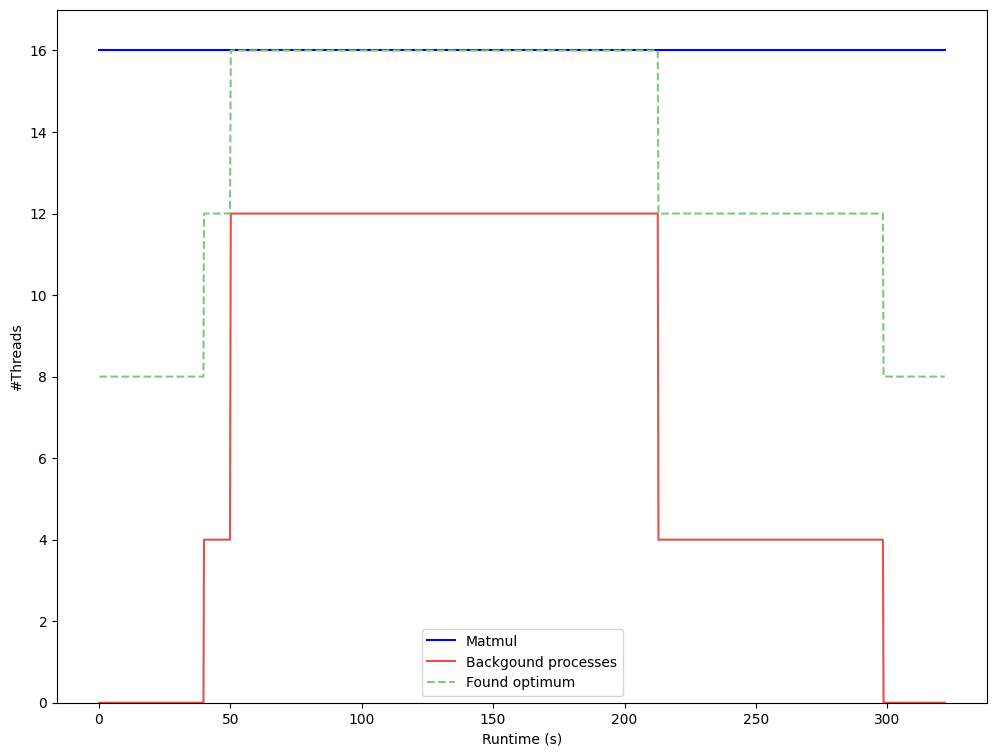

In [7]:
data = [(179122115, 178501310, 8419595, 16), (178356000, 170038365, 8533670, 16), (186324151, 184888583, 8943459, 16), (192526956, 188666649, 9169898, 16), (188798510, 187834203, 8999428, 16), (188377616, 188013223, 9034400, 16), (188198273, 191735903, 8993080, 16), (188423100, 188014474, 9013527, 16), (188178352, 188005366, 9050270, 16), (188919232, 188047119, 9015114, 16), (187022996, 187888898, 8968727, 16), (187729106, 187981152, 9024207, 16), (188400151, 188000496, 9034401, 16), (188274532, 188009907, 9070167, 16), (187214224, 187930623, 8979714, 16), (188280043, 188010755, 9035804, 16), (187972751, 187952336, 9050392, 16), (187615887, 187974071, 9045814, 16), (187229436, 184187619, 8985817, 16), (187529960, 187954292, 9054725, 16), (188124510, 187983999, 9050881, 16), (187469765, 187893497, 9004249, 16), (188387276, 187795547, 9073402, 16), (188813980, 188030671, 9048012, 16), (187625362, 187957702, 9054603, 16), (187760334, 187955366, 9050331, 16), (187471853, 187955188, 9015296, 16), (188312911, 188017650, 9041298, 16), (237102829, 236677946, 10849704, 16), (187843772, 184221937, 9021156, 16), (187895287, 187974381, 9042396, 16), (188036518, 187989665, 9063270, 16), (187633005, 187927835, 9046364, 16), (187797673, 187985183, 9064125, 16), (187774533, 187980461, 9043678, 16), (187271140, 187951716, 9019203, 16), (188384412, 188016262, 9085243, 16), (187818502, 187981611, 9035865, 16), (187320499, 187932961, 9018532, 16), (187966831, 187986870, 9061683, 16), (187493003, 187965311, 9067787, 16), (188098018, 187991177, 9058448, 16), (188251745, 188013914, 9095131, 16), (187322800, 187949931, 9017433, 16), (187784747, 187984490, 9032875, 16), (187673397, 187968172, 9079994, 16), (187187169, 184181697, 9068092, 16), (188098737, 187992134, 9071388, 16), (188206979, 187993201, 9080115, 16), (187419115, 187940546, 9027748, 16), (187726405, 187970341, 9070168, 16), (187183778, 187943514, 9014137, 16), (188510118, 188022314, 9101234, 16), (187827989, 187987432, 9043250, 16), (188550108, 188031242, 9104408, 16), (188001111, 187995922, 9070045, 16), (188344111, 188007854, 9081520, 16), (188308226, 188012530, 9081276, 16), (187364567, 187947413, 9082923, 16), (188226254, 188007266, 9079017, 16), (228579863, 229234023, 10568333, 16), (187473395, 184212549, 9024086, 16), (188196998, 188007089, 9117652, 16), (187919345, 187951688, 9047157, 16), (187230498, 187913821, 9081764, 16), (187600739, 187951457, 9034584, 16), (188639796, 188038209, 9119666, 16), (187824751, 187960880, 9083290, 16), (188183199, 186683293, 9115211, 16), (188044160, 182172378, 9140541, 16), (188511339, 188025838, 9060462, 16), (188238801, 187998794, 9118507, 16), (187866112, 188013489, 9086830, 16), (188069819, 187954428, 9094032, 16), (188138053, 191755150, 9067970, 16), (188527851, 188025875, 9085670, 16), (188421435, 188023012, 9135719, 16), (188350545, 188019406, 9084266, 16), (188539522, 188023948, 9119178, 16), (188429775, 187987686, 9101479, 16), (187540892, 188023180, 9079566, 16), (188205125, 187824874, 9069862, 16), (187392737, 187948149, 9048561, 16), (187652534, 187964763, 9067604, 16), (187062775, 187938526, 9049781, 16), (188456138, 188017297, 9086464, 16), (188307041, 188017070, 9099647, 16), (188361549, 188019394, 9122047, 16), (188416496, 188013815, 9118934, 16), (187727237, 187977547, 9042946, 16), (188037390, 187999539, 9110511, 16), (187897382, 187969552, 9092689, 16), (188045523, 187990929, 9093178, 16), (187974160, 187997293, 9103675, 16), (188571406, 188022475, 9124855, 16), (187931642, 187958699, 9110755, 16), (187734439, 187967274, 9095497, 16), (188168428, 188007284, 9097205, 16), (188006767, 187998017, 9101173, 16), (188047760, 187985131, 9066261, 16), (188266982, 188006919, 9156471, 16), (188231685, 188001612, 9097816, 16), (188184401, 188003714, 9103981, 16), (188380386, 188012319, 9149451, 16), (188377386, 188020641, 9088112, 16), (188060096, 187997146, 9095741, 16), (188071848, 188001036, 9104347, 16), (188028470, 187970836, 9095740, 16), (188261673, 188012629, 9106117, 16), (188431368, 191767567, 9155311, 16), (188086094, 187995960, 9110695, 16), (189153302, 188018064, 9142432, 16), (188548700, 188022914, 9136085, 16), (188564924, 188032937, 9098976, 16), (188321174, 188009302, 9122352, 16), (188063832, 188000577, 9150184, 16), (188808261, 188004690, 9103371, 16), (188868256, 191801241, 9131507, 16), (187635076, 187954033, 9113563, 16), (188158829, 188006164, 9089454, 16), (188665103, 188024441, 9152260, 16), (188606680, 188031404, 9138465, 16), (188372737, 188016592, 9117897, 16), (188554294, 188022054, 9099647, 16), (229358775, 229258273, 10620395, 16), (188163712, 187996241, 9116065, 16), (187618406, 184200823, 9061318, 16), (188466457, 191743762, 9131141, 16), (188589367, 188033825, 9155433, 16), (188293156, 188001692, 9105323, 16), (188026348, 187989782, 9100563, 16), (188495414, 188023908, 9095924, 16), (188226661, 188010247, 9154517, 16), (188867058, 188051911, 9147255, 16), (188460057, 188026463, 9114234, 16), (188859196, 191790708, 9148720, 16), (188840442, 188048916, 9151099, 16), (188259118, 188009135, 9109230, 16), (188062713, 187994271, 9109718, 16), (188133347, 187996633, 9096961, 16), (188067654, 188000743, 9097755, 16), (188514881, 188029774, 9138771, 16), (187550237, 187966789, 9095008, 16), (188628811, 187996923, 9115272, 16), (188395402, 188001373, 9117165, 16), (187919976, 187891952, 9095435, 16), (187965516, 187786497, 9105934, 16), (188265091, 188003526, 9110939, 16), (188257011, 188012745, 9138831, 16), (188550116, 188029069, 9143165, 16), (188114162, 187995265, 9085182, 16), (188202082, 188008601, 9122779, 16), (187783120, 187963181, 9070534, 16), (188026939, 187988930, 9080299, 16), (188243413, 188013699, 9108680, 16), (188705479, 191789339, 9096901, 16), (187669088, 187968554, 9036048, 16), (188424132, 188017508, 9053383, 16), (188586827, 188031634, 9105384, 16), (188433298, 187990531, 9068764, 16), (188926612, 188056160, 9118446, 16), (187956187, 187993888, 9059852, 16), (188580134, 188034479, 9125465, 16), (187507593, 187963029, 9032264, 16), (187670280, 187976557, 9065285, 16), (188448340, 188013003, 9120643, 16), (188768578, 188037097, 9080787, 16), (187369728, 187948045, 9057716, 16), (188314072, 188016036, 9062111, 16), (187246643, 187912275, 9042213, 16), (188233451, 188011962, 9080177, 16), (187832500, 187965341, 9070717, 16), (187684904, 187976921, 9064857, 16), (188250902, 187873019, 9125648, 16), (188345478, 188013373, 9136085, 16), (187801629, 187949147, 9093910, 16), (188368422, 188021327, 9137244, 16), (187892918, 187981918, 9101295, 16), (187614608, 187718459, 9084999, 16), (187691295, 187970273, 9131690, 16), (188264471, 188013584, 9112221, 16), (188631671, 187409138, 9157996, 16), (188495272, 188006971, 9113747, 16), (188510856, 191771710, 9145667, 16), (187788025, 187970104, 9126991, 16), (188051275, 187998917, 9109596, 16), (187956472, 187989361, 9129310, 16), (188765227, 188046240, 9159156, 16), (188243653, 188011618, 9122596, 16), (188236192, 188000851, 9105324, 16), (188606289, 188035026, 9166724, 16), (188914899, 188020520, 9130226, 16), (188340220, 188018592, 9129066, 16), (188471414, 188007865, 9111915, 16), (188162420, 187997993, 9159217, 16), (187478464, 187960460, 9089149, 16), (188433148, 188016586, 9121132, 16), (188071893, 187980207, 9143897, 16), (188131645, 188006629, 9121559, 16), (188057470, 191737894, 9127052, 16), (188453026, 188015489, 9121803, 16), (188011100, 187995634, 9116309, 16), (187414452, 184207830, 9125770, 16), (187499098, 187967147, 9076149, 16), (188595234, 191774133, 9156410, 16), (188956884, 188046517, 9178260, 16), (188061113, 187997809, 9098182, 16), (188080095, 187963608, 9130104, 16), (187499618, 187954290, 9102699, 16), (188181753, 188008655, 9068824, 16), (188371948, 188003758, 9175392, 16), (198825940, 198597636, 9529089, 16), (349073113, 307133685, 15520346, 16), (326435239, 274221218, 14741112, 16), (296486326, 248935664, 13717311, 16), (275958938, 226495594, 12013336, 16), (264021829, 223500303, 12095612, 16), (323952964, 261277647, 14891258, 16), (299171991, 249960558, 13862330, 16), (324987387, 262741467, 14639428, 16), (292807028, 233539746, 13749660, 16), (332389964, 264898446, 15212241, 16), (280029263, 221988575, 13075467, 16), (406640117, 320147353, 18606947, 16), (347835926, 277957140, 15362754, 16), (300150046, 243257979, 13966455, 16), (323207865, 255935854, 15036278, 16), (297371084, 243560846, 13419826, 16), (273349926, 221118290, 12356475, 16), (319582531, 261719819, 14758141, 16), (346434399, 281745001, 15420371, 16), (320022133, 253998923, 14507349, 16), (307967614, 247494654, 13828028, 16), (312030780, 247244402, 14248438, 16), (347951954, 270696187, 15183432, 16), (312002358, 246723033, 14424158, 16), (355988187, 285471282, 15835958, 16), (320039298, 266459275, 14482018, 16), (323953927, 269243296, 14773156, 16), (330558361, 264882123, 14946556, 16), (289426561, 239584156, 13049466, 16), (372021399, 301748368, 16882465, 16), (317328541, 253062443, 14612389, 16), (314678698, 219129528, 14678063, 16), (383992947, 233747156, 18285781, 16), (431950751, 262845163, 18755140, 16), (528039749, 324996130, 23747254, 16), (368787667, 217982274, 17089190, 16), (447151152, 262709212, 20223153, 16), (352026472, 210743878, 15927205, 16), (383960788, 225572871, 17478776, 16), (535988980, 329996510, 23456788, 16), (424034336, 259069680, 19669139, 16), (337841195, 202863796, 15637838, 16), (367436034, 224015859, 17362444, 16), (450661774, 275696153, 19763926, 16), (416032840, 260734183, 18999708, 16), (363978207, 220163177, 16340961, 16), (498625838, 299910494, 22883487, 16), (461359454, 280077848, 20481942, 16), (483991630, 282738528, 21805608, 16), (439951657, 253205786, 18595045, 16), (415996892, 222738117, 19264050, 16), (384025758, 204499655, 17560441, 16), (407963343, 216258994, 19285534, 16), (391990673, 225246481, 17153581, 16), (432027406, 239224713, 20253061, 16), (443950850, 246736236, 19885996, 16), (388033256, 221986856, 17953751, 16), (420010474, 248065107, 19500682, 16), (431965306, 259105444, 19728160, 16), (539959777, 318374957, 24228087, 16), (492020492, 287073317, 21334235, 16), (475996611, 272577424, 22271367, 16), (375824281, 207440239, 16894427, 16), (404375383, 226207306, 19098767, 16), (395765489, 222894038, 17473527, 16), (504000775, 266461147, 23924011, 16), (516005125, 264494174, 23635620, 16), (507945555, 268237836, 21310004, 16), (528054336, 294698467, 24195799, 16), (507964442, 278737072, 23321230, 16), (411997626, 233739677, 18408339, 16), (411992375, 230399119, 19274609, 16), (485928973, 262768521, 22306583, 16), (450054855, 246368616, 20768868, 16), (416008421, 228227198, 18691542, 16), (419438245, 233409237, 19225231, 16), (419811997, 239185472, 19865367, 16), (468729892, 274031439, 20939827, 16), (427939556, 239735181, 19302318, 16), (411991124, 218488475, 17980422, 16), (412039349, 221251880, 19696971, 16), (411980465, 222438419, 18311416, 16), (379699257, 212910138, 18019180, 16), (448282306, 248249980, 20028818, 16), (459968629, 256787615, 21303290, 16), (391989781, 216685755, 16933795, 16), (383993290, 207713397, 18410353, 16), (408007590, 221376299, 18694532, 16), (416022473, 226242563, 19672802, 16), (419991754, 227692365, 19182263, 16), (403991216, 219249440, 18973401, 16), (387980736, 204149016, 17644242, 16), (384003968, 195212727, 18249587, 16), (463966132, 235108098, 20394601, 16), (535981271, 272519688, 23608032, 16), (511982668, 289097213, 21923650, 16), (656029581, 373987955, 28110097, 16), (490087250, 291102002, 22027043, 16), (521859068, 298614954, 22459110, 16), (403989633, 231476560, 18254287, 16), (476032946, 272000569, 20769173, 16), (483964194, 267050295, 22145512, 16), (511978021, 278390020, 22514225, 16), (511987729, 276533661, 22235660, 16), (419995920, 243323086, 19293408, 16), (464042769, 252238652, 20987312, 16), (407939227, 227987621, 18534010, 16), (448036276, 253732408, 20464487, 16), (419998598, 232710066, 19915171, 16), (383980924, 215490257, 17614823, 16), (415956021, 234480317, 18563307, 16), (403996305, 237734350, 18225783, 16), (468038388, 273963192, 21600225, 16), (370816232, 209493786, 17284990, 16), (389163614, 224559475, 17954117, 16), (469207608, 267391152, 21538030, 16), (474783750, 275577685, 21252387, 16), (415981263, 226943464, 19593944, 16), (393149680, 225554540, 18074112, 16), (534801968, 293573979, 24079040, 16), (396021567, 225492958, 17676225, 16), (391993594, 218496105, 18820874, 16), (407984243, 231934519, 18780165, 16), (380026456, 220208596, 17877883, 16), (475930782, 276731765, 19973582, 16), (488044401, 286145818, 22754153, 16), (487981936, 270481546, 21540045, 16), (555997595, 328459691, 24680052, 16), (479990473, 273937162, 21218085, 16), (496011503, 290194871, 22603702, 16), (479981999, 264107846, 22309269, 16), (409412065, 228697896, 17851151, 16), (426538566, 238236983, 20053842, 16), (376029677, 205102030, 17113116, 16), (435987785, 254493805, 20506722, 16), (449591818, 260588421, 19945262, 16), (454415558, 265919928, 21262519, 16), (455941511, 274025423, 20685738, 16), (475982514, 288439091, 20679391, 16), (403994950, 247782141, 18052444, 16), (394479857, 236155914, 18363417, 16), (501504650, 292405195, 21947271, 16), (467985944, 275608695, 19844126, 16), (391992333, 229977685, 18128372, 16), (462487015, 269779779, 20559823, 16), (505549734, 286589751, 22912539, 16), (443976761, 243901690, 19555736, 16), (447957597, 253735233, 20362557, 16), (431988645, 243491742, 19585949, 16), (503990373, 276520139, 22399295, 16), (508042637, 294187575, 23011782, 16), (492021092, 314886489, 22379886, 16), (409637369, 252597851, 18659376, 16), (422305376, 255624095, 19750438, 16), (404007679, 240228595, 18694776, 16), (427985820, 250180699, 20107127, 16), (423989307, 258107832, 19351329, 16), (503954246, 303985939, 22345524, 16), (385262890, 234561682, 17947159, 16), (478873040, 281927039, 21754766, 16), (447905526, 267731478, 20833504, 16), (382174516, 221999765, 16885149, 16), (433791647, 258986518, 20614938, 16), (472007571, 269683825, 21680364, 16), (419186276, 233928693, 19235730, 16), (484744943, 274396276, 22010441, 16), (438621961, 253893311, 19752086, 16), (473359442, 275276949, 20654000, 16), (443994131, 253532478, 20252878, 16), (416036714, 225701426, 19085096, 16), (403947933, 223489111, 18653455, 16), (392601119, 213496107, 18617323, 16), (411418044, 231182435, 18666822, 16), (395985923, 217748895, 18389602, 16), (383997304, 208490721, 17774429, 16), (402442240, 212134426, 19084973, 16), (389544481, 207333816, 17754838, 16), (419961494, 222690613, 19492565, 16), (433431266, 235073872, 20034434, 16), (414592728, 215651691, 19697032, 16), (467957086, 253984510, 20914314, 16), (416032804, 237291187, 18969372, 16), (415996963, 227734113, 19743785, 16), (419983922, 232955146, 18908765, 16), (419996392, 228180774, 19469250, 16), (483947729, 268229153, 21223456, 16), (468037495, 260755715, 21816961, 16), (387983716, 207483438, 17213884, 16), (387176827, 216632625, 18377822, 16), (385786065, 218108798, 17878555, 16), (442982735, 249690205, 19999095, 16), (384026762, 219991544, 17480851, 16), (384002676, 219944349, 18210464, 16), (399947819, 233694138, 18007156, 16), (428051036, 256550937, 19858043, 16), (495982566, 299938777, 21970220, 16), (479942214, 281084901, 21623907, 16), (383991593, 224770402, 17026507, 16), (503988341, 297498645, 22653690, 16), (488005850, 277016679, 21233649, 16), (507982339, 287447587, 22658207, 16), (406076444, 225284906, 18525221, 16), (512155168, 299117332, 22933596, 16), (429742930, 248817136, 19713756, 16), (463997753, 270118800, 20343942, 16), (503019602, 288884632, 23480897, 16), (404979671, 230516474, 18224807, 16), (441937586, 241368139, 20494821, 16), (458057949, 255312090, 20901863, 16), (443960612, 246734264, 20229562, 16), (437103955, 252786875, 19991037, 16), (462912645, 262396953, 20416513, 16), (527997606, 292487221, 24621763, 16), (474934438, 247179201, 20955635, 16), (462158320, 247916219, 20774483, 16), (442846064, 238416203, 19487499, 16), (468046032, 250727678, 21787359, 16), (455972111, 254603908, 19953501, 16), (399958764, 219554097, 17994522, 16), (463997002, 248554512, 20408090, 16), (512029857, 286049528, 23640442, 16), (415990666, 229494750, 18981397, 16), (515985377, 275226008, 23210085, 16), (420031212, 238746150, 19948740, 16), (463921771, 258238588, 19646678, 16), (501361573, 263582669, 22786197, 16), (542623409, 303655111, 23560181, 16), (420035701, 243747802, 19212780, 16), (439998387, 252997887, 19884715, 16), (471937780, 266694968, 21121589, 16), (411990462, 234092345, 18683424, 16), (411992603, 226998228, 17938186, 16), (408043142, 241973141, 19310070, 16), (411992866, 246350435, 18912183, 16), (467990700, 279040172, 21608343, 16), (515947547, 318708602, 22638004, 16), (459991155, 282741445, 20514535, 16), (384029523, 236191271, 17479142, 16), (415995603, 255244063, 19255688, 16), (419995491, 257225203, 18675428, 16), (415991570, 243746685, 19745311, 16), (383063553, 219036591, 17863419, 16), (412928439, 243050067, 19101879, 16), (385157372, 227823461, 18031693, 16), (414820372, 246669486, 19562205, 16), (388760290, 225893480, 18067337, 16), (407187149, 243844700, 18365554, 16), (395477128, 232906369, 18659254, 16), (412562519, 250064761, 19357678, 16), (455946701, 273267876, 20168954, 16), (439991969, 256730404, 19496044, 16), (476039253, 290743534, 22022100, 16), (427946956, 258670050, 18740674, 16), (544033728, 341571098, 24319029, 16), (424017504, 261597923, 19805064, 16), (455929218, 282878639, 19970164, 16), (403998021, 246482558, 17821183, 16), (520031355, 301497082, 22857607, 16), (523955781, 308707863, 23610719, 16), (447989317, 267111543, 19264660, 16), (371992937, 209797273, 16978045, 16), (388031799, 221224567, 17633012, 16), (388723907, 224995013, 18469374, 16), (407223308, 236694094, 18119277, 16), (491994563, 269182182, 22021062, 16), (475986775, 262953034, 20655647, 16), (386498682, 229560659, 18256667, 16), (417490575, 247681489, 18709303, 16), (435991902, 252494438, 19772593, 16), (471995143, 295492644, 20798348, 16), (412040725, 274243074, 18987256, 16), (387983446, 247039590, 17581315, 16), (543961843, 339992974, 24025878, 16), (448046405, 272242293, 20711434, 16), (423940681, 237980768, 19058789, 16), (411555059, 237443518, 18937696, 16), (440453694, 242770306, 19627391, 16), (400020123, 231745631, 18611708, 16), (419932910, 245452990, 18646009, 16), (384097993, 225744436, 17792191, 16), (389921122, 228861169, 17760391, 16), (421962348, 233156467, 19382885, 16), (416032396, 234748180, 18951489, 16), (387991612, 217885217, 17912796, 16), (415994772, 241075899, 19205518, 16), (383997411, 220989208, 18201430, 16), (399945939, 225348056, 17997940, 16), (428041968, 246744591, 19812327, 16), (479951733, 272091106, 21245734, 16), (455982425, 259105427, 20723702, 16), (440037467, 242751233, 19323010, 16), (491946960, 274994740, 22512149, 16), (492036990, 262991548, 21643072, 16), (415982234, 222693345, 19275708, 16), (411962265, 232742376, 18529799, 16), (408042026, 231742858, 19175366, 16), (451976390, 262823392, 20311350, 16), (451965343, 249987404, 20799080, 16), (459572494, 259342758, 21142463, 16), (405120163, 242228825, 18350355, 16), (467325753, 273003634, 21121406, 16), (435962991, 244477795, 20300119, 16), (415507383, 225036422, 18906873, 16), (424494329, 228276623, 19992381, 16), (424549326, 230596757, 20105783, 16), (435422864, 232708882, 19539562, 16), (468874468, 239488696, 22173161, 16), (447088016, 239394252, 19397228, 16), (429066013, 238106951, 19860789, 16), (470951205, 271929150, 21340460, 16), (419990188, 240240625, 19149487, 16), (403955753, 232359088, 17870377, 16), (401851337, 238079705, 18841383, 16), (446053886, 260118551, 20549935, 16), (399751632, 236040990, 17763016, 16), (472187148, 276004702, 21047797, 16), (413039972, 248314597, 17958634, 16), (447079576, 257472862, 20452645, 16), (544026957, 314650573, 24769407, 16), (423730495, 246481303, 19051343, 16), (436209324, 253618586, 20110910, 16), (519992176, 285752900, 23082400, 16), (456049970, 251394306, 21098762, 16), (383979943, 215747845, 18361342, 16), (400400573, 224475606, 17877762, 16), (463593483, 278669631, 21814580, 16), (391975185, 230975310, 17801529, 16), (415996001, 238021079, 19603893, 16), (479987293, 254773036, 22442692, 16), (475963489, 267721394, 21088508, 16), (632264041, 353500558, 27570059, 16), (539750584, 304676954, 23838196, 16), (352246029, 210014485, 16212604, 16), (543735629, 326081003, 24705504, 16), (531945360, 311282044, 22816103, 16), (509317342, 311161969, 21857549, 16), (374716181, 220546571, 16749468, 16), (387937042, 229428358, 17871170, 16), (455990786, 260359862, 20604256, 16), (387989220, 223278755, 17439713, 16), (439947658, 259466466, 20206492, 16), (508036561, 309220721, 22594241, 16), (503990963, 292865742, 22012029, 16), (412024060, 247787096, 18095108, 16), (448003682, 265328786, 21065498, 16), (459994212, 257501017, 20638680, 16), (463996907, 250986952, 21290778, 16), (471946394, 251480503, 20685616, 16), (412038891, 223998302, 19556774, 16), (420003143, 225246885, 19486889, 16), (403931138, 227989737, 17848404, 16), (416048270, 229366021, 19836924, 16), (415985780, 224329596, 19045179, 16), (451950927, 244699275, 20399422, 16), (384040218, 222516517, 17748612, 16), (403979887, 221954354, 19155895, 16), (440031172, 243787672, 20519540, 16), (503974894, 285996561, 21854009, 16), (419940846, 258833739, 18606825, 16), (480037766, 303990100, 21399969, 16), (471946933, 275025278, 21748114, 16), (464009747, 268391343, 18892469, 16), (428011081, 243992703, 19639903, 16), (403991783, 238735332, 18657179, 16), (404002615, 235735755, 19196301, 16), (391985235, 223707566, 18126418, 16), (387991831, 224491419, 17778702, 16), (368017269, 216990189, 17140276, 16), (439935434, 266237447, 20217844, 16), (380037364, 226697539, 17499711, 16), (451941002, 263462488, 20219919, 16), (384033892, 236073375, 17724076, 16), (408002308, 247745818, 19036328, 16), (395984102, 238998300, 18230483, 16), (419953136, 253789580, 19020948, 16), (435995320, 266255387, 19634593, 16), (384042051, 230498388, 17985610, 16), (379943930, 232096683, 17110308, 16), (388040765, 228477414, 18081131, 16), (419951014, 245522333, 18891370, 16), (380033969, 215481399, 18004898, 16), (443952810, 264243421, 19361766, 16), (384030619, 226744158, 17979385, 16), (416007763, 236853815, 19487743, 16), (415980588, 234729512, 19274609, 16), (383990297, 223541104, 17700577, 16), (415994348, 246573539, 19348889, 16), (385005852, 219810328, 18491041, 16), (382985470, 223324816, 17505815, 16), (383992625, 221454561, 18169814, 16), (383097034, 214623219, 17723954, 16), (428848006, 256540891, 19357494, 16), (387991721, 231319769, 17046953, 16), (395993170, 241930684, 18085403, 16), (424023877, 249981963, 19902537, 16), (393638703, 231163109, 18248611, 16), (490339334, 280080720, 21400580, 16), (460001539, 261993794, 21649603, 16), (583980407, 321665005, 25489863, 16), (483977589, 279049898, 21430976, 16), (532028203, 304930831, 24626035, 16), (367998664, 214776792, 16988421, 16), (315998198, 183211000, 15229820, 16), (269826105, 154835704, 12571562, 16), (254141133, 190259505, 12268279, 16), (246794973, 195128645, 11813141, 16), (261982680, 211123424, 12074981, 16), (251170382, 205936525, 11015414, 16), (327995636, 267238976, 14600610, 16), (367989764, 288570375, 15878804, 16), (372028086, 304331537, 16807269, 16), (284610039, 223272034, 13326137, 16), (299763557, 234235279, 13503750, 16), (290924014, 227724670, 13712184, 16), (296137820, 231756028, 13950282, 16), (280527634, 228479721, 12920804, 16), (299978539, 247660771, 13449307, 16), (275988299, 227072420, 12338897, 16), (248000157, 205983037, 11386994, 16), (263501184, 207292649, 11854889, 16), (308511556, 253761740, 14195215, 16), (291996752, 226232821, 13741054, 16), (307955228, 239406925, 13622279, 16), (322246238, 248887436, 14895714, 16), (253778014, 199604163, 11471773, 16), (299962895, 231947082, 12505339, 16), (267994646, 205737828, 12748380, 16), (252023930, 195247958, 12227874, 16), (243116771, 187065528, 11766449, 16), (260454508, 207275631, 12471221, 16), (259750761, 217731813, 12095428, 16), (274449500, 226936599, 12578459, 16), (261892186, 216740747, 12153045, 16), (308781765, 262815208, 14017176, 16), (300606456, 244162965, 13856471, 16), (314920768, 258636713, 13960230, 16), (315952288, 250190812, 14517114, 16), (274580747, 226409751, 12658293, 16), (288518524, 239949248, 13057034, 16), (300914034, 243925066, 13679408, 16), (307956105, 254606417, 13550320, 16), (315990607, 259495496, 13678370, 16), (286423432, 231327390, 12914273, 16), (287409317, 237559307, 13323940, 16), (254187814, 214622260, 12055694, 16), (255956444, 208225401, 11335115, 16), (271992635, 221550423, 12018219, 16), (359995917, 290396727, 15747824, 16), (324024415, 261995727, 14614647, 16), (351991836, 292991138, 15101707, 16), (313846626, 252497308, 13711940, 16), (326152676, 265998283, 14990807, 16), (347992733, 278730825, 15635946, 16), (319989127, 255974352, 13985621, 16), (319963282, 249915348, 13436977, 16), (299992688, 240316989, 12961575, 16), (332034007, 272990527, 15193015, 16), (318741254, 245842775, 14349146, 16), (307735659, 233863944, 13684596, 16), (329987341, 262481094, 14426171, 16), (303472313, 243906744, 13562588, 16), (297953149, 225468168, 14182337, 16), (306386424, 230873048, 13794215, 16), (367629635, 278598396, 16011495, 16), (339999187, 266318937, 15392661, 16), (302931650, 228921729, 13804469, 16), (311776187, 240652369, 14685570, 16), (364818709, 278916604, 16713398, 16), (318186821, 253595533, 14457116, 16), (333790098, 277611459, 15222373, 16), (312449325, 267061259, 13797389, 16), (284026341, 238479997, 12992948, 16), (295997640, 247397634, 13745143, 16), (315613098, 253700153, 14656762, 16), (328336723, 268700927, 14817528, 16), (355997079, 290306609, 15703085, 16), (316035939, 259493228, 14701927, 16), (353425494, 284807983, 15931844, 16), (342521121, 270869050, 14945214, 16), (318626672, 254054225, 14784569, 16), (429361876, 353801519, 18566297, 16), (400094595, 337635732, 17637162, 16), (419887733, 337712218, 18193190, 16), (323991420, 259684632, 13852991, 16), (307997089, 248902869, 14150415, 16), (351989567, 283830871, 15514608, 16), (367993001, 286246852, 16106709, 16), (335995895, 267209757, 15598349, 16), (333645399, 257592604, 15087120, 16), (310341241, 247890022, 13981287, 16), (323994132, 263324760, 14509911, 16), (328021900, 263216358, 14578698, 16), (334183590, 264346466, 15509360, 16), (325805205, 256859672, 15164512, 16), (339966860, 272688681, 14888023, 16), (347993273, 280729948, 15360496, 16), (332355241, 262766398, 15327842, 16), (351658205, 277667475, 15650900, 16), (352260062, 276543130, 16287617, 16), (387696884, 303083025, 16938433, 16), (336022764, 271556406, 14962181, 16), (351963177, 287725738, 15448874, 16), (316042018, 260734675, 14446802, 16), (288838947, 231547299, 13252895, 16), (323122032, 261659749, 14792687, 16), (368813779, 293774170, 16925555, 16), (331182417, 260750123, 15100242, 16), (327967641, 253492072, 14730980, 16), (353916950, 268485317, 16119039, 16), (302103233, 253456438, 13924036, 16), (296017051, 234246866, 13955958, 16), (307902338, 235238650, 14455835, 16), (336025620, 260728845, 15011863, 16), (316030984, 255210642, 14572655, 16), (313224325, 248566504, 14214685, 16), (342748500, 276325233, 15633750, 16), (360388438, 295516647, 16381427, 16), (291577759, 234980372, 13076505, 16), (315161635, 254916393, 14482690, 16), (349065017, 290772496, 15929586, 16), (327922109, 264227347, 14834129, 16), (318643904, 247413702, 14626977, 16), (349182370, 278822221, 15543844, 16), (303985156, 244001693, 13370144, 16), (316023633, 252747360, 14493676, 16), (375965927, 301722535, 17034746, 16), (315354260, 250707838, 14210657, 16), (327540825, 263962222, 14831505, 16), (342302011, 275329524, 15853536, 16), (318813176, 258672320, 14578820, 16), (326948737, 259433217, 14520410, 16), (313054511, 252757486, 14684960, 16), (307462039, 246183860, 14325586, 16), (329700659, 261628615, 14706261, 16), (334763919, 265790500, 14459008, 16), (403998150, 316727093, 17838821, 16), (392024596, 302796017, 17361345, 16), (388001753, 315444163, 17570390, 16), (344003430, 274246110, 15427450, 16), (303949630, 247440979, 13702175, 16), (328954175, 274044233, 15164940, 16), (319514318, 263714151, 14570458, 16), (275513730, 234290669, 12347869, 16), (318582464, 251119906, 14908714, 16), (330209088, 283923835, 15092674, 16), (411223713, 322140235, 18184524, 16), (319991005, 259210022, 15027915, 16), (391964561, 314521188, 16706928, 16), (327994493, 279237311, 14386133, 16), (378856034, 317912302, 17005754, 16), (301172994, 248303995, 13799953, 16), (316049708, 260738989, 13775966, 16), (355937093, 288963233, 16384297, 16), (372113635, 304993963, 16829058, 16), (307834943, 259806420, 13320523, 16), (316033356, 262533574, 14636560, 16), (376962263, 296265590, 17248552, 16), (270986550, 225185092, 11786835, 16), (389246087, 320129082, 17461076, 16), (342743045, 279157748, 15707113, 16), (282918099, 223609370, 13079922, 16), (323812654, 254594784, 15124351, 16), (401250125, 320313688, 18057510, 16), (293491960, 238796937, 13600002, 16), (348733376, 269777587, 16290730, 16), (311515743, 252695036, 14009790, 16), (342238387, 274450183, 15128807, 16), (320724734, 264789768, 14803551, 16), (323262478, 254200524, 14504907, 16), (299923879, 240990286, 13837856, 16), (300063460, 251424783, 14071009, 16), (367992813, 292979727, 15817220, 16), (307998556, 247741025, 13825465, 16), (327987770, 253189172, 14651208, 16), (407990630, 320245138, 17727311, 16), (316030242, 254698711, 14312097, 16), (344010406, 278740318, 15928793, 16), (311948505, 253992919, 14202051, 16), (339370240, 272410936, 15297934, 16), (384618050, 315533027, 16796710, 16), (408023409, 324934457, 17594315, 16), (415990810, 343962620, 17614518, 16), (383975250, 313745959, 16716937, 16), (331994043, 258447701, 15255393, 16), (336014762, 262983760, 15076805, 16), (388006402, 315244839, 17541764, 16), (403958221, 337256818, 16948931, 16), (291994666, 240256375, 12576750, 16), (313871638, 250249804, 14234278, 16), (342119038, 278217774, 15189780, 16), (351987358, 288737119, 15150596, 16), (296033250, 237247623, 13497036, 16), (343985954, 277496011, 15895345, 16), (319985747, 257223817, 14845177, 16), (320585577, 253505644, 14362573, 16), (323431776, 254809766, 14968590, 16), (379941813, 306860219, 16655047, 16), (283566637, 222944836, 12831571, 16), (316447389, 249604394, 14906029, 16), (319967537, 256712310, 14392175, 16), (295677325, 241515975, 13334926, 16), (294250900, 235847125, 13614651, 16), (322095398, 262355849, 15019981, 16), (339948273, 268243000, 14735558, 16), (340003014, 267232670, 15639670, 16), (334186025, 267289654, 15244529, 16), (282571037, 228207692, 12917508, 16), (317937924, 260569329, 14349634, 16), (316847237, 254763431, 14787804, 16), (320456695, 260271235, 14687218, 16), (315981762, 253227944, 14055994, 16), (347998039, 282748655, 16045186, 16), (327968422, 259691420, 14734765, 16), (332026427, 266353755, 14728356, 16), (325693104, 261851834, 15175987, 16), (326306037, 264139269, 14971397, 16), (315949539, 264954917, 13634486, 16), (319996243, 270920966, 14592980, 16), (286170414, 234861545, 13438930, 16), (289057570, 236311362, 13386746, 16), (340753838, 270599026, 14838707, 16), (335993514, 273246298, 14972679, 16), (311489558, 251695354, 14371179, 16), (324496605, 268668832, 14069239, 16), (433282914, 358801948, 19268200, 16), (318720764, 258386858, 14176905, 16), (304238537, 241999558, 13839564, 16), (351735384, 288689599, 15385032, 16), (363992433, 292483396, 16020100, 16), (327991778, 265990009, 14054651, 16), (316032422, 259775308, 14400476, 16), (305665148, 256348020, 14162073, 16), (298764317, 235412947, 14129053, 16), (287720945, 227454758, 13611476, 16), (387822160, 298475607, 17831376, 16), (317858757, 248607668, 14216638, 16), (315220954, 259412385, 14601525, 16), (370818256, 282922189, 16830951, 16), (352054095, 287985209, 15477926, 16), (379995954, 306999295, 16872576, 16), (322444808, 260910682, 14442529, 16), (305592853, 243594480, 14333033, 16), (361537823, 285343390, 16532001, 16), (334422786, 264647849, 14847374, 16), (317210667, 245533973, 14821983, 16), (347574632, 275467052, 16018514, 16), (395170524, 306395124, 16592060, 16), (403665233, 316944464, 18311171, 16), (281952580, 235618096, 12830900, 16), (426364661, 338735371, 19068127, 16), (307450334, 249962052, 13960414, 16), (336570194, 274770275, 14912620, 16), (395967183, 318507331, 17350054, 16), (384028944, 299747918, 17018145, 16), (323958773, 252888252, 14169214, 16), (370127788, 285249372, 16792681, 16), (353859072, 282301232, 15751852, 16), (383990178, 298703041, 16591449, 16), (392022975, 312499406, 17201983, 16), (318193369, 251774324, 14235132, 16), (353770045, 274939085, 16100056, 16), (334300178, 269355439, 15067528, 16), (320449144, 258874706, 14763634, 16), (355588205, 281207613, 16451374, 16), (293016753, 235059664, 13212429, 16), (238708800, 202374387, 10978366, 16), (191464369, 191947271, 9317297, 16), (190543063, 191895744, 9256630, 16), (190737929, 188169057, 9276587, 16), (190986964, 191929328, 9307410, 16), (191322942, 191951859, 9288734, 16), (190833520, 191926432, 9291297, 16), (190490490, 188124742, 9281287, 16), (191088276, 191927548, 9328101, 16), (190651074, 191834309, 9262489, 16), (191119475, 188154785, 9329505, 16), (191333777, 191955257, 9321021, 16), (190838995, 191923256, 9252418, 16), (190640243, 191896081, 9301062, 16), (190465743, 188139801, 9299781, 16), (191008620, 191935536, 9297095, 16), (191397966, 191957672, 9314369, 16), (191101653, 191930959, 9305762, 16), (190412616, 188103711, 9259803, 16), (190869318, 191927339, 9316626, 16), (191560076, 191952949, 9347633, 16), (190604869, 188159138, 9291663, 16), (190906086, 191929320, 9288001, 16), (191759793, 190519211, 9327247, 16), (199987415, 194296575, 9684606, 16), (190596442, 188902964, 9331458, 16), (190646129, 186414644, 9289466, 16), (190948016, 191926890, 9315955, 16), (190130960, 191848715, 9330055, 16), (189937591, 188111537, 9279822, 16), (191237757, 191951056, 9315467, 16), (191109526, 191941809, 9327430, 16), (190693964, 188140118, 9322608, 16), (191352142, 191941566, 9319922, 16), (191276113, 191934662, 9330543, 16), (190795204, 191919837, 9321753, 16), (191458762, 191946111, 9344825, 16), (190955805, 188180887, 9361975, 16), (191240616, 191941663, 9337989, 16), (189561995, 191823721, 9247596, 16), (191110598, 188176352, 9373206, 16), (191212362, 191913873, 9340003, 16), (191050728, 191935791, 9327186, 16), (190931306, 191930584, 9340003, 16), (191258195, 188196868, 9330542, 16), (191114657, 191943375, 9337501, 16), (191125935, 191938188, 9330054, 16), (190043577, 191851267, 9282386, 16), (191256683, 188202143, 9339942, 16), (191154151, 192039267, 9387793, 16), (188997204, 187694534, 9241493, 16), (190153399, 191823039, 9307410, 16), (190902753, 191929073, 9317664, 16), (191341764, 191956151, 9347388, 16), (191427139, 188210767, 9345923, 16), (191178188, 191937446, 9370582, 16), (191408553, 191924249, 9354346, 16), (191347330, 191956153, 9336280, 16), (191037729, 191935354, 9371924, 16), (190723220, 188168490, 9312904, 16), (189901431, 191839197, 9294715, 16), (191152086, 191945083, 9347266, 16), (190367038, 188136227, 9289710, 16), (191044912, 191928300, 9371619, 16), (198237118, 196136715, 9574804, 16), (191242098, 191948352, 9328651, 16), (191195088, 191932890, 9327002, 16), (191042840, 191925912, 9378150, 16), (191387575, 191956155, 9351722, 16), (191344781, 191957470, 9328406, 16), (190700708, 188156331, 9342811, 16), (191078687, 191899758, 9345130, 16), (189673598, 188068440, 9286536, 16), (191105408, 191920718, 9354773, 16), (191094381, 191942447, 9338355, 16), (190599239, 191899825, 9311073, 16), (191204194, 186020905, 9382849, 16), (190962592, 187120174, 9412207, 16), (189364854, 188069775, 9310707, 16), (190388343, 191895558, 9293555, 16), (189714427, 191853172, 9315223, 16), (189669204, 188086820, 9308814, 16), (190358792, 191894229, 9295691, 16), (190988962, 188179612, 9342811, 16), (189762113, 191844263, 9316871, 16), (189158844, 188070774, 9261939, 16), (189524538, 188076293, 9291541, 16), (189227675, 191820608, 9274207, 16), (189458142, 188040703, 9263953, 16), (189780826, 191856706, 9307838, 16), (189787602, 188100212, 9299415, 16), (189751126, 188090062, 9262549, 16), (190159696, 191880469, 9361121, 16), (191199661, 191945114, 9370337, 16), (190902273, 188170901, 9344764, 16), (190430548, 191899500, 9314735, 16), (191231345, 191948037, 9375159, 16), (191635046, 191965579, 9338477, 16), (189680332, 188101570, 9309974, 16), (190877501, 191905389, 9360876, 16), (189952634, 188118811, 9317115, 16), (190679791, 191908604, 9301368, 16), (191346845, 191941977, 9384375, 16), (189510078, 188079263, 9268348, 16), (191099325, 191909607, 9349036, 16), (191324232, 191946941, 9352882, 16), (191065234, 191940695, 9399878, 16), (191050281, 188178965, 9332862, 16), (191173421, 191943689, 9341101, 16), (191283238, 191945472, 9344947, 16), (190936619, 191929442, 9362952, 16), (191208846, 191949991, 9337806, 16), (190614893, 188137992, 9334571, 16), (191357479, 191957655, 9349768, 16), (190446022, 191899373, 9319068, 16), (189397802, 188053394, 9267921, 16), (191034513, 191937934, 9357703, 16), (191005436, 191926316, 9338660, 16), (191363290, 188200216, 9353492, 16), (190799561, 191888993, 9381812, 16), (190960935, 191932977, 9310645, 16), (191056609, 191928386, 9367530, 16), (191090417, 188239843, 9346655, 16)]
plot('Fixed at 16 threads', data, 258450, 162818)
plt.show()